In [1]:
from dbcp.etl import etl_gridstatus_isoqueues

transformed = etl_gridstatus_isoqueues()

/app/.local/lib/python3.10/site-packages/geopandas/_compat.py:123: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  warnings.warn(
/app/.local/lib/python3.10/site-packages/pudl/analysis/spatial.py:7: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=262006177488-ka1m0ue4fptfmt9siejdd5lom7p39upa.apps.googleusercontent.com&redirect_uri=https%3A%2F%2Fpydata-google-auth.readthedocs.io%2Fen%2Flatest%2Foauth.html&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform&state=bMvu8JnDfNjjQmMvIRIX6kOM2Hr2wj&access_type=offline


Enter the authorization code:  4/0AfJohXlqXbEvtJNk1zweGxogWdpj3LMT6usPr38Bfhf33zfw47DUxhno6GLnDslNfJr7LA


2023-12-19 02:00:06 [    INFO] catalystcoop.pudl.helpers:203 Assigned state FIPS codes for 99.38% of records.
2023-12-19 02:00:06 [    INFO] catalystcoop.pudl.helpers:219 Assigned county FIPS codes for 94.73% of records.
2023-12-19 02:00:06 [    INFO] catalystcoop.pudl.helpers:203 Assigned state FIPS codes for 88.24% of records.
2023-12-19 02:00:06 [    INFO] catalystcoop.pudl.helpers:219 Assigned county FIPS codes for 62.30% of records.
/app/dbcp/helpers.py:86: FutureWarning: Using .astype to convert from timezone-aware dtype to timezone-naive dtype is deprecated and will raise in a future version.  Use obj.tz_localize(None) or obj.tz_convert('UTC').tz_localize(None) instead
  return df.astype(dtypes)


In [2]:
gs = transformed["gridstatus_projects"]
# gs = gs.convert_dtypes()
# gs.dtypes

In [3]:
gs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7092 entries, 0 to 7091
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   project_id                  7092 non-null   Int64         
 1   actual_completion_date      2 non-null      datetime64[ns]
 2   capacity_mw                 7064 non-null   float64       
 3   county                      6982 non-null   string        
 4   resource                    6978 non-null   string        
 5   interconnecting_entity      1053 non-null   string        
 6   point_of_interconnection    3794 non-null   string        
 7   project_name                5242 non-null   string        
 8   proposed_completion_date    3053 non-null   datetime64[ns]
 9   queue_date                  7081 non-null   datetime64[ns]
 10  queue_id                    7092 non-null   string        
 11  state                       7054 non-null   string      

In [3]:
from dbcp.helpers import get_schema_sql_alchemy_metadata

schema = "data_warehouse"
table_name = "gridstatus_projects"

table_name = f"{schema}.{table_name}"
metadata = get_schema_sql_alchemy_metadata(schema)

In [4]:
SA_TO_PD_TYPES = {
    "VARCHAR": "string",
    "INTEGER": "Int64",
    "FLOAT": "float64",
    "BOOLEAN": "boolean",
    "DATETIME": "datetime64[ns]",
}

dtypes = {col.name: SA_TO_PD_TYPES[str(col.type)] for col in metadata.tables[table_name].columns}

In [10]:
import pandas as pd

gs["summer_capacity_mw"] = pd.to_numeric(gs.summer_capacity_mw)
gs["winter_capacity_mw"] = pd.to_numeric(gs.winter_capacity_mw)

In [11]:
for col, dtype in dtypes.items():
    print(col)
    # try:
    gs[col].astype({col: dtype})
    # except:
    #     print(f"\tFailure: {col}")

project_id
actual_completion_date
capacity_mw
county
resource
interconnecting_entity
point_of_interconnection
project_name
proposed_completion_date
queue_date
queue_id
state
queue_status
summer_capacity_mw
transmission_owner
winter_capacity_mw
withdrawal_comment
withdrawn_date
is_actionable
is_nearly_certain
iso_region
state_id_fips
county_id_fips
geocoded_locality_name
geocoded_locality_type
geocoded_containing_county
resource_clean


/tmp/ipykernel_249/791317899.py:4: FutureWarning: Using .astype to convert from timezone-aware dtype to timezone-naive dtype is deprecated and will raise in a future version.  Use obj.tz_localize(None) or obj.tz_convert('UTC').tz_localize(None) instead
  gs[col].astype({col: dtype})


In [7]:
gs.summer_capacity_mw.apply(type).value_counts()

<class 'float'>                          6511
<class 'str'>                             501
<class 'pandas._libs.missing.NAType'>      80
Name: summer_capacity_mw, dtype: int64

In [37]:
field = "withdrawal_comment"
gs[gs[field].apply(lambda x: isinstance(x, str))][field]

Series([], Name: withdrawal_comment, dtype: object)

In [39]:
import pandas as pd
pd.to_numeric(gs.summer_capacity_mw)

0         64.000
1        225.200
2         51.800
3         44.200
4        292.900
          ...   
7087         NaN
7088         NaN
7089     800.000
7090      61.851
7091    1000.000
Name: summer_capacity_mw, Length: 7092, dtype: float64

In [4]:
transformed.is_actionable.value_counts()

False    4891
True     2230
Name: is_actionable, dtype: int64

In [41]:
transformed.convert_dtypes().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7121 entries, 0 to 7120
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   actual_completion_date      2 non-null      datetime64[ns]
 1   capacity_mw                 7093 non-null   Float64       
 2   county                      7011 non-null   string        
 3   resource                    7007 non-null   string        
 4   interconnecting_entity      1053 non-null   string        
 5   interconnection_location    3823 non-null   string        
 6   project_name                5242 non-null   string        
 7   proposed_completion_date    3053 non-null   object        
 8   queue_date                  7110 non-null   object        
 9   queue_id                    7121 non-null   object        
 10  state                       7083 non-null   string        
 11  status                      7121 non-null   string      

In [45]:
transformed.loc[
        transformed.county_id_fips.eq("51515"), "county_id_fips"
    ] = "51019"

In [48]:
transformed.query("county == 'Bedford'")

,actual_completion_date,capacity_mw,county,resource,interconnecting_entity,interconnection_location,project_name,proposed_completion_date,queue_date,queue_id,state,status,summer_capacity_mw,transmission_owner,winter_capacity_mw,withdrawal_comment,withdrawn_date,is_actionable,is_nearly_certain,region,state_id_fips,county_id_fips,geocoded_locality_name,geocoded_locality_type,geocoded_containing_county,resource_clean
project_id,,,,,,,,,,,,,,,,,,,,,,,,,,
1786,NaT,102.1,Bedford,Solar,<NA>,<NA>,Rockcastle 138 kV,<NA>,2018-07-31 00:00:00,AE1-064,VA,active,67.3,AEP,102.1,<NA>,NaT,True,False,pjm,51,51019,Bedford,county,Bedford,Solar
2074,NaT,20.0,Bedford,Solar,<NA>,<NA>,Snake Spring 115 kV I,<NA>,2020-03-31 00:00:00,AF2-336,PA,active,12.0,PENELEC,20.0,<NA>,NaT,True,False,pjm,42,42009,Bedford,county,Bedford,Solar
2075,NaT,20.0,Bedford,Solar,<NA>,<NA>,Snake Spring 115 kV II,<NA>,2020-03-31 00:00:00,AF2-337,PA,active,12.0,PENELEC,20.0,<NA>,NaT,True,False,pjm,42,42009,Bedford,county,Bedford,Solar
2462,NaT,20.0,Bedford,Solar,<NA>,<NA>,Rockcastle 138 kV,<NA>,2020-12-28 00:00:00,AG2-066,VA,active,12.0,AEP,20.0,<NA>,NaT,False,False,pjm,51,51019,Bedford,county,Bedford,Solar
2473,NaT,20.0,Bedford,Solar,<NA>,<NA>,Clearville-Clearville Junction 34.5 kV,<NA>,2021-01-20 00:00:00,AG2-079,PA,active,13.3,APS,20.0,<NA>,NaT,False,False,pjm,42,42009,Bedford,county,Bedford,Solar
2617,NaT,0.0,Bedford,Solar; Storage,<NA>,<NA>,Whitehouse-Lone Gum 138 kV,<NA>,2021-01-29 00:00:00,AG2-246,VA,active,0.0,AEP,0.0,<NA>,NaT,False,False,pjm,51,51019,Bedford,county,Bedford,Solar
2675,NaT,75.0,Bedford,Storage,<NA>,<NA>,Smith Mountain 138 kV,<NA>,2021-03-23 00:00:00,AG2-311,VA,active,75.0,AEP,75.0,<NA>,NaT,False,False,pjm,51,51019,Bedford,county,Bedford,Battery Storage
3144,NaT,16.0,Bedford,Solar,<NA>,<NA>,Curryville-RKB-Yellow Creek 23 kV,<NA>,2021-08-31 00:00:00,AH1-162,PA,active,11.0,PENELEC,16.0,<NA>,NaT,False,False,pjm,42,42009,Bedford,county,Bedford,Solar
3216,NaT,80.0,Bedford,Solar,<NA>,<NA>,Osterberg 115kV,<NA>,2021-09-09 00:00:00,AH1-246,PA,active,48.0,PENELEC,80.0,<NA>,NaT,False,False,pjm,42,42009,Bedford,county,Bedford,Solar


In [10]:
for region in transformed.region.unique():
    print(region, transformed.query("region == @region").queue_id.is_unique)

miso False
caiso True
pjm True
ercot True
spp True
nyiso True
isone True


In [12]:
transformed.query("region == 'miso'").queue_id.value_counts()

J2029    2
J2211    2
J2055    2
J2277    2
J2218    2
        ..
J1827    1
J1826    1
J1824    1
J1821    1
J2970    1
Name: queue_id, Length: 1309, dtype: int64

In [14]:
transformed.query("region == 'miso' & queue_id == 'J2029'").drop_duplicates()

,actual_completion_date,capacity_mw,county,resource,interconnecting_entity,interconnection_location,project_name,proposed_completion_date,queue_date,queue_id,state,status,summer_capacity_mw,transmission_owner,winter_capacity_mw,withdrawal_comment,withdrawn_date,region,state_id_fips,county_id_fips,geocoded_locality_name,geocoded_locality_type,geocoded_containing_county,resource_clean
project_id,,,,,,,,,,,,,,,,,,,,,,,,
801,NaT,62.5,Marquette,Solar,<NA>,Perch Lake Substation,<NA>,<NA>,2021-11-30 05:00:00+00:00,J2029,MI,active,62.5,American Transmission Co. LLC,62.5,<NA>,<NA>,miso,26,26103,Marquette,county,Marquette,Solar


## Initial exploration

In [115]:
from google.cloud import storage

import pydata_google_auth
from google.cloud import storage
import os
from dbcp.extract.helpers import get_gcp_credentials

bucket_name = "gridstatus-archive"

GCP_PROJECT_ID = os.environ.get("GCP_PROJECT_ID")

credentials = get_gcp_credentials()

bucket = storage.Client(credentials=credentials, project=GCP_PROJECT_ID).bucket(
    bucket_name, user_project=GCP_PROJECT_ID
)

isos = ['miso', 'caiso', 'pjm', 'ercot', 'spp', 'nyiso', 'isone']

for iso in isos:
    object_name = f"interconnection_queues/{iso}.parquet"

    blob = bucket.blob(str(object_name))
    blob.reload()
    print(iso, blob.time_created, blob.generation)

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=262006177488-ka1m0ue4fptfmt9siejdd5lom7p39upa.apps.googleusercontent.com&redirect_uri=https%3A%2F%2Fpydata-google-auth.readthedocs.io%2Fen%2Flatest%2Foauth.html&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform&state=bDcMMIx1gypODd1OFPWqdjrm7khRQs&access_type=offline


Enter the authorization code:  4/0AfJohXn34Ei34jWktlN0G6NIINgKSQC8Sm0UTQb8wz30E7_o2ZRjCGk2k1AigGVVV4xHQA


miso 2023-12-04 22:52:59.358000+00:00 1701730379212665
caiso 2023-12-04 22:52:59.925000+00:00 1701730379782773
pjm 2023-12-04 22:53:00.489000+00:00 1701730380346804
ercot 2023-12-04 22:53:01.034000+00:00 1701730380870486
spp 2023-12-04 22:53:01.545000+00:00 1701730381410448
nyiso 2023-12-04 22:53:02.029000+00:00 1701730381901584
isone 2023-12-04 22:53:02.543000+00:00 1701730382409516


In [7]:
import dbcp

# # These are the revision numbers of the oldest archives we have
# iso_queue_versions: dict[str, str] = {
#     "miso": "1681775160487863",
#     "caiso": "1681775162586588",
#     "pjm": "1681775160979859",
#     "ercot": "1681775161342766",
#     "spp": "1681775162935809",
#     "nyiso": "1681775159356063",
#     "isone": "1681775162111351",
# }

# These are the latest revision numbers as of 11/21/23
iso_queue_versions: dict[str, str] = {
    "miso": "1701730379212665",
    "caiso": "1701730379782773",
    "pjm": "1701730380346804",
    "ercot": "1701730380870486",
    "spp": "1701730381410448",
    "nyiso": "1701730381901584",
    "isone": "1701730382409516",
}

gs_dfs = dbcp.extract.gridstatus_isoqueues.extract(iso_queue_versions)

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=262006177488-ka1m0ue4fptfmt9siejdd5lom7p39upa.apps.googleusercontent.com&redirect_uri=https%3A%2F%2Fpydata-google-auth.readthedocs.io%2Fen%2Flatest%2Foauth.html&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform&state=qDSQ2YTEwHd2NKXShEoidFfGqw9aOy&access_type=offline


Enter the authorization code:  4/0AfJohXkS4s2xLxdbVhdR3FJjeNGJQlQLBj2yL0cOHHdAdOsg2OLR3dlMvknSfN6bgt0dOw


## Clean status information

### Ercot

In [27]:
ercot = gs_dfs["ercot"]
ercot.head()

,Queue ID,Project Name,Interconnecting Entity,County,State,Interconnection Location,Transmission Owner,Generation Type,Capacity (MW),Summer Capacity (MW),Winter Capacity (MW),Queue Date,Status,Proposed Completion Date,Withdrawn Date,Withdrawal Comment,Actual Completion Date,Fuel,Technology,GIM Study Phase,Screening Study Started,Screening Study Complete,FIS Requested,FIS Approved,Economic Study Required,IA Signed,Air Permit,GHG Permit,Water Availability,Meets Planning,Meets All Planning,CDR Reporting Zone,Approved for Energization,Approved for Synchronization,Comment
0,14INR0033,Goodnight Wind,"FGE Goodnight I, LLC",Armstrong,Texas,tap 345kV 79500 Alibates - 79503 Tule Canyon CKT2,<NA>,Wind - Wind Turbine,258.1,<NA>,<NA>,2012-07-24,Completed,2024-02-14,<NA>,<NA>,2023-11-21,Wind,Wind Turbine,"SS Completed, FIS Completed, IA",2012-07-24,2012-09-19,2013-03-04,2023-02-06,No,2019-08-18,Not Required,Not Required,Not Required,2023-05-01,2023-05-01,PANHANDLE,2023-11-15,2023-11-21,<NA>
1,15INR0064b,Harald (BearKat Wind B),CIP,Glasscock,Texas,59903 Bearkat 345kV,<NA>,Wind - Wind Turbine,162.1,<NA>,<NA>,2013-11-27,Completed,2024-01-31,<NA>,<NA>,2020-05-12,Wind,Wind Turbine,"SS Completed, FIS Completed, IA",2013-11-27,2014-01-27,2014-04-15,2017-09-27,No,2018-05-30,Not Required,Not Required,Not Required,2018-05-30,2018-09-19,WEST,2020-02-10,2020-05-12,<NA>
2,16INR0049,Nazareth Solar,"TX Nazareth Solar, LLC",Castro,Texas,tap 345kV 23914 Tule Canyon - 23912 Ogallala C2,<NA>,Solar - Photovoltaic Solar,204.0,<NA>,<NA>,2014-06-19,Completed,2025-03-24,<NA>,<NA>,NaT,Solar,Photovoltaic Solar,"SS Completed, FIS Completed, IA",2014-06-19,2014-07-25,2014-07-01,2023-04-17,No,2023-06-07,Not Required,Not Required,Not Required,NaT,NaT,PANHANDLE,NaT,NaT,<NA>
3,16INR0081,Mesteno Wind,"Mesteno Windpower, LLC",Starr,Texas,80355 Del Sol 345kV,<NA>,Wind - Wind Turbine,201.6,<NA>,<NA>,2014-12-30,Completed,2024-01-31,<NA>,<NA>,2019-12-12,Wind,Wind Turbine,"SS Completed, FIS Completed, IA",2014-12-30,2015-03-09,2014-12-30,2018-01-29,No,2018-04-25,Not Required,Not Required,Not Required,2018-04-25,2019-03-28,SOUTH,2019-11-26,2019-12-12,<NA>
4,16INR0085,Priddy Wind,ENGIE North America,Mills,Texas,tap 345kV 1444 Brown – 3422 Killeen,<NA>,Wind - Wind Turbine,302.4,<NA>,<NA>,2015-01-14,Completed,2023-12-30,<NA>,<NA>,2021-11-19,Wind,Wind Turbine,"SS Completed, FIS Completed, IA",2015-01-14,2015-02-10,2015-03-06,2021-04-30,No,2020-08-13,Not Required,Not Required,Not Required,2021-03-29,2021-04-30,NORTH,2021-10-13,2021-11-19,<NA>


In [28]:
set([string for row in ercot["GIM Study Phase"].str.split(", ").to_list() for string in row])

{'FIS Completed',
 'FIS Not Started',
 'FIS Started',
 'IA',
 'No IA',
 'SS Completed',
 'SS Started'}

From https://www.ercot.com/files/docs/2021/01/07/Resource_Interconnection_Handbook_v1.94_03012023.docx:
- SS: Security Screening Study (Not explicitly stated but seems like the most likely)
- IA: Standard Generation Interconnection Agreement
- FIS: Full Interconnection Study

In [29]:
ercot["IA Signed"].isna().value_counts()

True     1053
False     374
Name: IA Signed, dtype: int64

In [30]:
# How many projects have an IA status but no IA signed information?
(ercot["GIM Study Phase"].str.contains(", IA") & ercot["IA Signed"].isna()).value_counts()

False    1427
dtype: Int64

In [31]:
ercot["GIM Study Phase"].str.split(", ").apply(len).value_counts()

3    1427
Name: GIM Study Phase, dtype: int64

In [32]:
list(ercot["GIM Study Phase"].unique())

['SS Completed, FIS Completed, IA',
 'SS Completed, FIS Started, IA',
 'SS Completed, FIS Started, No IA',
 'SS Completed, FIS Not Started, IA',
 'SS Completed, FIS Completed, No IA',
 'SS Started, FIS Started, No IA']

In [44]:
ercot["is_ia_signed"] = ~ercot["IA Signed"].isna()
ercot[["GIM Study Phase", "is_ia_signed"]].value_counts(dropna=False)

GIM Study Phase                     is_ia_signed
SS Completed, FIS Started, No IA    False           853
SS Completed, FIS Completed, IA     True            250
SS Completed, FIS Started, IA       True            121
SS Started, FIS Started, No IA      False           108
SS Completed, FIS Completed, No IA  False            92
SS Completed, FIS Not Started, IA   True              3
dtype: int64

In [39]:
ercot["GIM Study Phase"]

0        SS Completed, FIS Completed, IA
1        SS Completed, FIS Completed, IA
2        SS Completed, FIS Completed, IA
3        SS Completed, FIS Completed, IA
4        SS Completed, FIS Completed, IA
                      ...               
1422    SS Completed, FIS Started, No IA
1423    SS Completed, FIS Started, No IA
1424    SS Completed, FIS Started, No IA
1425    SS Completed, FIS Started, No IA
1426    SS Completed, FIS Started, No IA
Name: GIM Study Phase, Length: 1427, dtype: string

#### Integration

In [50]:
actionable_ia_statuses = {
    'SS Completed, FIS Started, No IA',
    'SS Completed, FIS Completed, No IA',
}
nearly_certain_ia_statuses = {
    'SS Completed, FIS Completed, IA',
    'SS Completed, FIS Started, IA',
    'SS Completed, FIS Not Started, IA',
}
ercot["is_actionable"] = (
    ercot["GIM Study Phase"].isin(actionable_ia_statuses).fillna(False)
)
ercot["is_nearly_certain"] = (
    ercot["GIM Study Phase"]
    .isin(nearly_certain_ia_statuses)
    .fillna(False)
)

print(ercot.is_actionable.value_counts())
print(ercot.is_nearly_certain.value_counts())

assert (~ercot[["is_actionable", "is_nearly_certain"]].all(axis=1)).all()

True     945
False    482
Name: is_actionable, dtype: int64
False    1053
True      374
Name: is_nearly_certain, dtype: int64


## caiso

In [51]:
caiso = gs_dfs["caiso"]
caiso.head()

,Queue ID,Project Name,Interconnecting Entity,County,State,Interconnection Location,Transmission Owner,Generation Type,Capacity (MW),Summer Capacity (MW),Winter Capacity (MW),Queue Date,Status,Proposed Completion Date,Withdrawn Date,Withdrawal Comment,Actual Completion Date,Type-1,Type-2,Type-3,Fuel-1,Fuel-2,Fuel-3,MW-1,MW-2,MW-3,Interconnection Request Receive Date,Interconnection Agreement Status,Study Process,Proposed On-line Date (as filed with IR),System Impact Study or Phase I Cluster Study,Facilities Study (FAS) or Phase II Cluster Study,Optional Study (OS),"Full Capacity, Partial or Energy Only (FC/P/EO)",Off-Peak Deliverability and Economic Only,Feasibility Study or Supplemental Review
0,22,MONTEZUMA (HIGH WINDS III),<NA>,SOLANO,CA,Birds Landing Sub 230 kV Bus,PGAE,Wind Turbine + Storage,38.0,<NA>,<NA>,2003-11-18 08:00:00,ACTIVE,2024-04-01 07:00:00,NaT,<NA>,NaT,Wind Turbine,Storage,<NA>,Wind Turbine,Battery,<NA>,38.0,38.0,<NA>,2003-11-18,Executed,AMEND 39,2005-06-30 07:00:00,Complete,Complete,<NA>,Partial Capacity,Off-Peak Deliverability,<NA>
1,32,TULE WIND,<NA>,SAN DIEGO,CA,Boulevard East Substation 138 kV,SDGE,Wind Turbine,193.8,<NA>,<NA>,2004-05-24 07:00:00,ACTIVE,2027-12-31 08:00:00,NaT,<NA>,NaT,Wind Turbine,<NA>,<NA>,Wind Turbine,<NA>,<NA>,193.8,<NA>,<NA>,2004-05-12,Executed,Serial LGIP,2007-09-01 07:00:00,Complete,Complete,None,Partial Capacity,Off-Peak Deliverability,Waived
2,61,FRESNO COGENERATION EXPANSION PROJECT,<NA>,FRESNO,CA,Helm-Kerman 70kV line,PGAE,Steam Turbine + Storage,73.27,<NA>,<NA>,2005-03-30 08:00:00,ACTIVE,2023-02-28 08:00:00,NaT,<NA>,NaT,Steam Turbine,Storage,<NA>,Natural Gas,Battery,<NA>,73.269997,18.5,<NA>,2005-03-28,Executed,AMEND 39,2006-05-31 07:00:00,Complete,Complete,<NA>,<NA>,Off-Peak Deliverability,<NA>
3,72,LAKE ELSINORE ADVANCED PUMPED STORAGE PROJECT,<NA>,RIVERSIDE,CA,Proposed Lee Lake Substation 500 kV,SDGE,Storage,500.0,<NA>,<NA>,2005-06-21 07:00:00,ACTIVE,2028-12-31 08:00:00,NaT,<NA>,NaT,Storage,<NA>,<NA>,Pumped-Storage hydro,<NA>,<NA>,500.0,<NA>,<NA>,2005-04-26,Executed,Serial LGIP,2008-12-31 08:00:00,Complete,Re-Study,None,Full Capacity,<NA>,Waived
4,81,BOTTLE ROCK POWER,<NA>,LAKE,CA,Geysers #17 - Fulton 230kV Line,PGAE,Steam Turbine + Storage,52.01,<NA>,<NA>,2005-09-13 07:00:00,ACTIVE,2007-10-31 07:00:00,NaT,<NA>,NaT,Steam Turbine,Storage,<NA>,Geothermal,Battery,<NA>,9.435,47.4465,<NA>,2005-09-13,Executed,Serial LGIP,2006-09-01 07:00:00,Complete,Complete,None,Energy Only,Off-Peak Deliverability,None


In [52]:
active_caiso = caiso.query("Status == 'ACTIVE'")
active_caiso.head()

,Queue ID,Project Name,Interconnecting Entity,County,State,Interconnection Location,Transmission Owner,Generation Type,Capacity (MW),Summer Capacity (MW),Winter Capacity (MW),Queue Date,Status,Proposed Completion Date,Withdrawn Date,Withdrawal Comment,Actual Completion Date,Type-1,Type-2,Type-3,Fuel-1,Fuel-2,Fuel-3,MW-1,MW-2,MW-3,Interconnection Request Receive Date,Interconnection Agreement Status,Study Process,Proposed On-line Date (as filed with IR),System Impact Study or Phase I Cluster Study,Facilities Study (FAS) or Phase II Cluster Study,Optional Study (OS),"Full Capacity, Partial or Energy Only (FC/P/EO)",Off-Peak Deliverability and Economic Only,Feasibility Study or Supplemental Review
0,22,MONTEZUMA (HIGH WINDS III),<NA>,SOLANO,CA,Birds Landing Sub 230 kV Bus,PGAE,Wind Turbine + Storage,38.0,<NA>,<NA>,2003-11-18 08:00:00,ACTIVE,2024-04-01 07:00:00,NaT,<NA>,NaT,Wind Turbine,Storage,<NA>,Wind Turbine,Battery,<NA>,38.0,38.0,<NA>,2003-11-18,Executed,AMEND 39,2005-06-30 07:00:00,Complete,Complete,<NA>,Partial Capacity,Off-Peak Deliverability,<NA>
1,32,TULE WIND,<NA>,SAN DIEGO,CA,Boulevard East Substation 138 kV,SDGE,Wind Turbine,193.8,<NA>,<NA>,2004-05-24 07:00:00,ACTIVE,2027-12-31 08:00:00,NaT,<NA>,NaT,Wind Turbine,<NA>,<NA>,Wind Turbine,<NA>,<NA>,193.8,<NA>,<NA>,2004-05-12,Executed,Serial LGIP,2007-09-01 07:00:00,Complete,Complete,None,Partial Capacity,Off-Peak Deliverability,Waived
2,61,FRESNO COGENERATION EXPANSION PROJECT,<NA>,FRESNO,CA,Helm-Kerman 70kV line,PGAE,Steam Turbine + Storage,73.27,<NA>,<NA>,2005-03-30 08:00:00,ACTIVE,2023-02-28 08:00:00,NaT,<NA>,NaT,Steam Turbine,Storage,<NA>,Natural Gas,Battery,<NA>,73.269997,18.5,<NA>,2005-03-28,Executed,AMEND 39,2006-05-31 07:00:00,Complete,Complete,<NA>,<NA>,Off-Peak Deliverability,<NA>
3,72,LAKE ELSINORE ADVANCED PUMPED STORAGE PROJECT,<NA>,RIVERSIDE,CA,Proposed Lee Lake Substation 500 kV,SDGE,Storage,500.0,<NA>,<NA>,2005-06-21 07:00:00,ACTIVE,2028-12-31 08:00:00,NaT,<NA>,NaT,Storage,<NA>,<NA>,Pumped-Storage hydro,<NA>,<NA>,500.0,<NA>,<NA>,2005-04-26,Executed,Serial LGIP,2008-12-31 08:00:00,Complete,Re-Study,None,Full Capacity,<NA>,Waived
4,81,BOTTLE ROCK POWER,<NA>,LAKE,CA,Geysers #17 - Fulton 230kV Line,PGAE,Steam Turbine + Storage,52.01,<NA>,<NA>,2005-09-13 07:00:00,ACTIVE,2007-10-31 07:00:00,NaT,<NA>,NaT,Steam Turbine,Storage,<NA>,Geothermal,Battery,<NA>,9.435,47.4465,<NA>,2005-09-13,Executed,Serial LGIP,2006-09-01 07:00:00,Complete,Complete,None,Energy Only,Off-Peak Deliverability,None


In [53]:
active_caiso["Interconnection Agreement Status"].value_counts(dropna=False)

<NA>           258
Executed       180
In Progress     22
Name: Interconnection Agreement Status, dtype: Int64

In [54]:
active_caiso["System Impact Study or Phase I Cluster Study"].value_counts(dropna=False)

Complete            452
<NA>                  6
Facilities Study      2
Name: System Impact Study or Phase I Cluster Study, dtype: Int64

In [55]:
active_caiso["Facilities Study (FAS) or Phase II Cluster Study"].value_counts(dropna=False)

Complete    247
<NA>        209
SGIA          2
Re-Study      1
None          1
Name: Facilities Study (FAS) or Phase II Cluster Study, dtype: Int64

In [56]:
study_cols = ["Facilities Study (FAS) or Phase II Cluster Study", "System Impact Study or Phase I Cluster Study", "Interconnection Agreement Status"]
active_caiso[study_cols].value_counts(dropna=False).sort_index()


Facilities Study (FAS) or Phase II Cluster Study  System Impact Study or Phase I Cluster Study  Interconnection Agreement Status
Complete                                          Complete                                      Executed                            175
                                                                                                In Progress                          22
                                                                                                <NA>                                 50
None                                              Complete                                      Executed                              1
Re-Study                                          Complete                                      Executed                              1
SGIA                                              Facilities Study                              Executed                              2
<NA>                                              Compl

#### Integration

In [60]:
study_cols = {"Facilities Study (FAS) or Phase II Cluster Study": "FAS", "System Impact Study or Phase I Cluster Study": "SIS", "Interconnection Agreement Status": "IA"}

caiso["gs_study_status"] = ""

for col, abbr in study_cols.items():
    caiso["gs_study_status"] += abbr + ": " + caiso[col] + ", "

In [62]:
caiso["gs_study_status"].value_counts()

FAS: Complete, SIS: Complete, IA: Executed,          364
FAS: Complete, SIS: Complete, IA: In Progress,        47
FAS: SGIA, SIS: Facilities Study, IA: Executed,       21
FAS: Re-Study, SIS: Complete, IA: Executed,            5
FAS: None, SIS: Complete, IA: Executed,                5
FAS: None, SIS: None, IA: Executed,                    4
FAS: Re-Study, SIS: Complete, IA: In Progress,         3
FAS: Complete, SIS: Complete, IA: Terminated,          2
FAS: Re-Study, SIS: Re-Study, IA: Executed,            1
FAS: Complete, SIS: Re-Study, IA: Executed,            1
FAS: Complete, SIS: Unexpected, IA: Executed,          1
FAS: SGIA, SIS: None, IA: Executed,                    1
FAS: Complete, SIS: None, IA: Executed,                1
FAS: Complete, SIS: Complete, IA: Filed Unexec...      1
FAS: None, SIS: None, IA: In Progress,                 1
Name: gs_study_status, dtype: Int64

In [66]:
study_cols = {"Facilities Study (FAS) or Phase II Cluster Study": "FAS", "System Impact Study or Phase I Cluster Study": "SIS", "Interconnection Agreement Status": "IA"}

for col in study_cols.keys():
    print(caiso[col].value_counts())
    print()

None         812
Complete     646
SGIA          48
Re-Study      13
Withdrawn      1
Name: Facilities Study (FAS) or Phase II Cluster Study, dtype: Int64

Complete            1248
None                 658
Facilities Study      49
Re-Study               9
Unexpected             1
Waived                 1
Name: System Impact Study or Phase I Cluster Study, dtype: Int64

Executed            415
In Progress          52
Terminated            2
Filed Unexecuted      1
Name: Interconnection Agreement Status, dtype: Int64



In [100]:
caiso["completed_fas"] = caiso["Facilities Study (FAS) or Phase II Cluster Study"].eq("Completed").fillna(False)
caiso["completed_sis"] = caiso["System Impact Study or Phase I Cluster Study"].eq("Completed").fillna(False)
caiso["executed_ia"] = caiso["Interconnection Agreement Status"].eq("Executed").fillna(False)

caiso["is_nearly_certain"] = caiso["executed_ia"].copy()
caiso["is_actionable"] = (caiso.completed_sis | caiso.completed_fas) & ~caiso.executed_ia

assert (~caiso[["is_actionable", "is_nearly_certain"]].all(axis=1)).all()

## PJM

In [101]:
pjm = gs_dfs["pjm"]
pjm.head()

,Queue ID,Project Name,Interconnecting Entity,County,State,Interconnection Location,Transmission Owner,Generation Type,Capacity (MW),Summer Capacity (MW),Winter Capacity (MW),Queue Date,Status,Proposed Completion Date,Withdrawn Date,Withdrawal Comment,Actual Completion Date,MW In Service,Commercial Name,Initial Study,Feasibility Study,Feasibility Study Status,System Impact Study,System Impact Study Status,Facilities Study,Facilities Study Status,Interim Interconnection Service Agreement,Interim/Interconnection Service Agreement Status,Wholesale Market Participation Agreement,Construction Service Agreement,Construction Service Agreement Status,Upgrade Construction Service Agreement,Upgrade Construction Service Agreement Status,Backfeed Date,Long-Term Firm Service Start Date,Long-Term Firm Service End Date,Test Energy Date,completed_feasibility_study,completed_system_impact_study,completed_facilities_study_status,ia_executed,executed_ia,is_nearly_certain,is_actionable
0,A01,South Lebanon 230 KV,<NA>,Lebanon,PA,<NA>,ME,Natural Gas,673.0,673.0,720.0,1997-04-01,In Service,4/1/2002,<NA>,<NA>,4/1/2002,673.0,Ironwood,<NA>,https://www.pjm.com/pub/planning/project-queue...,Document Posted,https://www.pjm.com/pub/planning/project-queue...,Document Posted,https://www.pjm.com/pub/planning/project-queue...,Document Posted,https://www.pjm.com/pub/planning/project-queue...,Document Posted,<NA>,<NA>,Not Required,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,True,True,True,True,True,True,False
1,A02,Oak Hall 138 kV (Oil CT),<NA>,Unknown,VA,<NA>,DPL,Oil,311.8,315.0,315.0,1997-04-01,In Service,<NA>,<NA>,<NA>,8/22/2001,311.8,Chesapeake,<NA>,https://www.pjm.com/pub/planning/project-queue...,Document Posted,https://www.pjm.com/pub/planning/project-queue...,Document Posted,<NA>,Not Required,https://www.pjm.com/pub/planning/project-queue...,Document Posted,<NA>,<NA>,Not Required,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,True,True,False,True,True,True,False
2,A03,Linden 230 kV or 138 kV,<NA>,Union,NJ,<NA>,PSEG,Natural Gas,114.0,120.0,120.0,1997-04-01,In Service,<NA>,<NA>,<NA>,6/1/2000,114.0,Linden 5 & 6,<NA>,https://www.pjm.com/pub/planning/project-queue...,Document Posted,https://www.pjm.com/pub/planning/project-queue...,Document Posted,<NA>,Not Required,https://www.pjm.com/pub/planning/project-queue...,Document Posted,<NA>,<NA>,Not Required,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,True,True,False,True,True,True,False
3,A04,Linden 230 kV or 138 kV,<NA>,Union,NJ,<NA>,PPL,Natural Gas,750.0,750.0,750.0,1997-04-01,In Service,<NA>,<NA>,<NA>,5/1/2006,750.0,"Linden 1, 2 & 3",<NA>,https://www.pjm.com/pub/planning/project-queue...,Document Posted,https://www.pjm.com/pub/planning/project-queue...,Document Posted,https://www.pjm.com/pub/planning/project-queue...,Document Posted,https://www.pjm.com/pub/planning/project-queue...,Document Posted,<NA>,<NA>,Not Required,<NA>,<NA>,6/10/2004,<NA>,<NA>,3/11/2005,True,True,True,True,True,True,False
4,A05,Bergen,<NA>,Bergen,NJ,<NA>,PSEG,Natural Gas,500.0,500.0,500.0,1997-04-01,In Service,<NA>,<NA>,<NA>,6/1/2002,500.0,Bergen,<NA>,https://www.pjm.com/pub/planning/project-queue...,Document Posted,https://www.pjm.com/pub/planning/project-queue...,Document Posted,https://www.pjm.com/pub/planning/project-queue...,Document Posted,https://www.pjm.com/pub/planning/project-queue...,Document Posted,<NA>,<NA>,Not Required,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,True,True,True,True,True,True,False


In [102]:
pjm.Status.value_counts()

Withdrawn                                    4357
Active                                       2772
In Service                                   1114
Engineering and Procurement                   298
Confirmed                                     224
Retracted                                     131
Suspended                                     124
Deactivated                                    58
Under Construction                             52
Partially in Service - Under Construction      38
Annulled                                       24
Canceled                                        1
Name: Status, dtype: Int64

In [103]:
active_pjm = pjm.query("Status == 'Active'")

status_cols = {
    "Feasibility Study Status": "completed_feasibility_study",
    "System Impact Study Status": "completed_system_impact_study",
    "Facilities Study Status": "completed_facilities_study_status",
    "Interim/Interconnection Service Agreement Status": "ia_executed",
}

for col in status_cols:
    print(active_pjm[col].value_counts(dropna=False))
    print()

In Progress        2127
Document Posted     624
<NA>                 12
Not Required          6
Withdrawn             3
Name: Feasibility Study Status, dtype: Int64

<NA>               2145
Document Posted     479
In Progress         148
Name: System Impact Study Status, dtype: Int64

<NA>               2293
In Progress         474
Document Posted       5
Name: Facilities Study Status, dtype: Int64

<NA>               2750
Interim Study        20
Document Posted       2
Name: Interim/Interconnection Service Agreement Status, dtype: Int64



In [104]:
active_pjm[status_cols].sample(5)

/tmp/ipykernel_78/698254646.py:1: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  active_pjm[status_cols].sample(5)


,Feasibility Study Status,System Impact Study Status,Facilities Study Status,Interim/Interconnection Service Agreement Status
7739,In Progress,<NA>,<NA>,<NA>
8879,In Progress,<NA>,<NA>,<NA>
6678,In Progress,<NA>,<NA>,<NA>
7311,In Progress,<NA>,<NA>,<NA>
7323,In Progress,<NA>,<NA>,<NA>


In [105]:
active_pjm[~active_pjm["Interim/Interconnection Service Agreement Status"].isna()][status_cols]

/tmp/ipykernel_78/3836523260.py:1: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  active_pjm[~active_pjm["Interim/Interconnection Service Agreement Status"].isna()][status_cols]


,Feasibility Study Status,System Impact Study Status,Facilities Study Status,Interim/Interconnection Service Agreement Status
4688,Document Posted,Document Posted,Document Posted,Document Posted
5192,Document Posted,Document Posted,In Progress,Interim Study
5293,Document Posted,Document Posted,In Progress,Interim Study
5322,Document Posted,Document Posted,Document Posted,Document Posted
5353,Document Posted,Document Posted,In Progress,Interim Study
5354,Document Posted,Document Posted,In Progress,Interim Study
5355,Document Posted,Document Posted,In Progress,Interim Study
5358,Document Posted,Document Posted,In Progress,Interim Study
5359,Document Posted,Document Posted,In Progress,Interim Study
5371,Document Posted,Document Posted,In Progress,Interim Study


I'm assuming "document posted" means the study is completed? According to [this presentation](https://www.pjm.com/-/media/committees-groups/task-forces/iprtf/postings/interconnection-process-overview.ashx) and some sample data, the studies look like they are sequential. However, it looks like the agreements are not sequential. You can have documents posted for  "Construction Service Agreement" but interim studies for "Interim/Interconnection Service Agreement Status". Maybe we can create a single status column the the most advanced in Progress column? I'm assuming it's the current in progress phase?

#### Integration

In [169]:
gs_dfs.keys()

dict_keys(['miso', 'caiso', 'pjm', 'ercot', 'spp', 'nyiso', 'isone'])

In [106]:
status_cols = {
    "Feasibility Study Status": "completed_feasibility_study",
    "System Impact Study Status": "completed_system_impact_study",
    "Facilities Study Status": "completed_facilities_study_status",
    "Interim/Interconnection Service Agreement Status": "executed_ia",
}

for col, comp_col in status_cols.items():
    pjm[comp_col] = pjm[col].eq("Document Posted").fillna(False)
    
pjm["is_nearly_certain"] = pjm["executed_ia"].copy()
pjm["is_actionable"] = (pjm.completed_system_impact_study | pjm.completed_facilities_study_status) & ~pjm.executed_ia

assert (~pjm[["is_actionable", "is_nearly_certain"]].all(axis=1)).all()

## MISO

In [107]:
miso = gs_dfs["miso"]
miso.head()

,Queue ID,Project Name,Interconnecting Entity,County,State,Interconnection Location,Transmission Owner,Generation Type,Capacity (MW),Summer Capacity (MW),Winter Capacity (MW),Queue Date,Status,Proposed Completion Date,Withdrawn Date,Withdrawal Comment,Actual Completion Date,facilityType,Post Generator Interconnection Agreement Status,Interconnection Approval Date,inService,giaToExec,studyCycle,studyGroup,studyPhase,svcType,dp1ErisMw,dp1NrisMw,dp2ErisMw,dp2NrisMw,sisPhase1
0,E002,<NA>,<NA>,Pointe Coupee,LA,500 kV switchyard at Big Cajon II,Entergy,Gas,15.0,15.0,15.0,2013-09-13T04:00:00Z,Done,<NA>,<NA>,<NA>,<NA>,,In Service,2003-12-13T05:00:00Z,<NA>,2013-12-16T05:00:00Z,,,,ERIS,0.0,0.0,0.0,0.0,
1,E291,<NA>,<NA>,,TX,Rich 138 kV substation,Entergy,Hydro,27.0,27.0,27.0,2012-05-15T04:00:00Z,Done,2016-01-31T05:00:00Z,<NA>,<NA>,<NA>,HY Hydraulic Turbine (including turnbines asso...,Under Construction,2013-10-22T04:00:00Z,2016-01-01T05:00:00Z,2013-10-22T04:00:00Z,,,,ERIS,0.0,0.0,0.0,0.0,
2,G001,<NA>,<NA>,Brown County,WI,Unknown,American Transmission Co. LLC,,255.0,255.0,255.0,1995-11-08T05:00:00Z,Withdrawn,2014-11-17T05:00:00Z,<NA>,<NA>,<NA>,,Withdrawn,<NA>,<NA>,<NA>,,,SPA - SIS,ERIS,0.0,0.0,0.0,0.0,
3,G002,<NA>,<NA>,Trimble County,KY,Unknown,LG&E and KU Services Company as agent for Loui...,Coal,174.0,174.0,174.0,1998-12-01T05:00:00Z,Done,2016-01-01T05:00:00Z,<NA>,<NA>,<NA>,,Not Started,<NA>,<NA>,<NA>,,,,ERIS,0.0,0.0,0.0,0.0,
4,G003,<NA>,<NA>,Trimble County,KY,Unknown,LG&E and KU Services Company as agent for Loui...,Coal,174.0,174.0,174.0,1998-12-01T05:00:00Z,Done,2004-01-01T05:00:00Z,<NA>,<NA>,<NA>,,Not Started,<NA>,<NA>,<NA>,,,,ERIS,0.0,0.0,0.0,0.0,


In [108]:
miso.Status.value_counts()

Withdrawn    2128
Active       1325
Done          828
                1
Name: Status, dtype: Int64

In [109]:
active_miso = miso.query("Status == 'Active'")

In [110]:
active_miso["studyPhase"].value_counts()

Study Not Started    569
SPA - SIS            557
Network Upgrade      114
PHASE 3               46
PHASE 2               22
                      17
Name: studyPhase, dtype: Int64

In [111]:
active_miso.sample(5)

,Queue ID,Project Name,Interconnecting Entity,County,State,Interconnection Location,Transmission Owner,Generation Type,Capacity (MW),Summer Capacity (MW),Winter Capacity (MW),Queue Date,Status,Proposed Completion Date,Withdrawn Date,Withdrawal Comment,Actual Completion Date,facilityType,Post Generator Interconnection Agreement Status,Interconnection Approval Date,inService,giaToExec,studyCycle,studyGroup,studyPhase,svcType,dp1ErisMw,dp1NrisMw,dp2ErisMw,dp2NrisMw,sisPhase1
2621,J1502,<NA>,<NA>,Juneau,WI,Briggs Road - North Madison 345KV,American Transmission Co. LLC,Solar,225.0,225.0,225.0,2020-06-18T04:00:00Z,Active,<NA>,<NA>,<NA>,<NA>,PV Photovoltaic,Not Started,<NA>,2023-03-31T04:00:00Z,<NA>,DPP-2020-Cycle,East (ATC),PHASE 2,NRIS,225.0,225.0,225.0,225.0,
2875,J2262,<NA>,<NA>,Jackson,AR,Independence(A) (500kV) -Powerline(B) (500kV),"Entergy Arkansas, LLC",Solar,652.0,652.0,652.0,2021-10-11T04:00:00Z,Active,<NA>,<NA>,<NA>,<NA>,PV Photovoltaic,Not Started,<NA>,2024-02-02T05:00:00Z,<NA>,,,SPA - SIS,NRIS,652.0,652.0,0.0,0.0,
817,J1876,<NA>,<NA>,Decatur,IN,Greensburg,"Duke Energy Indiana, LLC",Solar,140.0,140.0,140.0,2022-03-28T04:00:00Z,Active,<NA>,<NA>,<NA>,<NA>,PV Photovoltaic,Not Started,<NA>,2024-09-15T04:00:00Z,<NA>,DPP-2021-Cycle,Central,SPA - SIS,NRIS,0.0,0.0,0.0,0.0,
3516,J1578,<NA>,<NA>,Bartholomew,IN,Columbus -Greenwood Clark Twp 230kV line (Circ...,"Duke Energy Indiana, LLC",Solar,200.0,200.0,200.0,2020-06-18T04:00:00Z,Active,<NA>,<NA>,<NA>,<NA>,PV Photovoltaic,Not Started,<NA>,2023-04-01T04:00:00Z,<NA>,DPP-2020-Cycle,Central,SPA - SIS,NRIS,200.0,200.0,0.0,0.0,
1976,J2716,<NA>,<NA>,Dakota,MN,HAMPTON 345 KV,Northern States Power (Xcel Energy),Battery Storage,300.0,300.0,300.0,2022-09-14T04:00:00Z,Active,<NA>,<NA>,<NA>,<NA>,BS Battery Storage,Not Started,<NA>,2027-04-15T04:00:00Z,<NA>,DPP-2022-Cycle,West,Study Not Started,NRIS,0.0,0.0,0.0,0.0,


In [113]:
miso["studyPhase"].value_counts()

SPA - SIS            1247
Study Not Started     706
GIA                   497
PHASE 3               429
Network Upgrade       396
Feasibility           343
                      340
DPP - SIS             208
PHASE 2                69
Optional               24
Int FaS                18
Out of Cycle            4
MTEP                    1
Name: studyPhase, dtype: Int64

The only official doc about the MISO process isn't super helpful. Looks like there are four phases: 1, 2, 3 and Generator Interconnection Agreement. Not clear how these map to the values in the data.

- Phase 3: Facility Study
- GIA: IA Executed
- SPA - SIS: System Impact Study
- Feasibility: Feasibility Study
- PHASE 1: Feasibility Study
- PHASE 2: System Impact Study
- PHASE 3: System Impact Study

In [115]:
miso["studyPhase"] = miso["studyPhase"].str.upper()

actionable_ia_statuses = {
    'PHASE 2',
    'PHASE 3',
}
nearly_certain_ia_statuses = {
    "GIA"
}
miso["is_actionable"] = (
    miso["studyPhase"].isin(actionable_ia_statuses).fillna(False)
)
miso["is_nearly_certain"] = (
    miso["studyPhase"]
    .isin(nearly_certain_ia_statuses)
    .fillna(False)
)

print(miso.is_actionable.value_counts())
print(miso.is_nearly_certain.value_counts())

assert (~miso[["is_actionable", "is_nearly_certain"]].all(axis=1)).all()

False    3784
True      498
Name: is_actionable, dtype: int64
False    3785
True      497
Name: is_nearly_certain, dtype: int64


## SPP

In [161]:
spp = gs_dfs["spp"]
spp.head()

,Queue ID,Project Name,Interconnecting Entity,County,State,Interconnection Location,Transmission Owner,Generation Type,Capacity (MW),Summer Capacity (MW),Winter Capacity (MW),Queue Date,Status,Proposed Completion Date,Withdrawn Date,Withdrawal Comment,Actual Completion Date,In-Service Date,Commercial Operation Date,Cessation Date,Current Cluster,Cluster Group,Replacement Generator Commercial Op Date,Service Type,Status (Original)
0,GEN-2023-SR9,<NA>,<NA>,Lorenzo,TX,Tap Floyd County Interchange and Crosby County...,Xcel,Battery/Storage,50.0,50.0,50.0,2/13/2023,Active,6/1/2025,<NA>,<NA>,<NA>,<NA>,6/1/2025,<NA>,Surplus,05 SOUTHWEST,<NA>,ER,None
1,GEN-2023-SR8,<NA>,<NA>,Gruver,TX,Hitchland 345 kV Substation,Xcel,Battery/Storage,200.0,200.0,200.0,2/13/2023,Completed,6/1/2026,<NA>,<NA>,<NA>,<NA>,6/1/2026,<NA>,Surplus,05 SOUTHWEST,<NA>,ER,IA FULLY EXECUTED/ON SCHEDULE
2,GEN-2023-SR7,<NA>,<NA>,Wayne Co,NE,Hoskins 345 kV Substation,NPPD,Battery/Storage,135.0,135.0,135.0,12/16/2022,Active,12/31/2024,<NA>,<NA>,<NA>,<NA>,12/31/2024,<NA>,Surplus,02 NEBRASKA,<NA>,ER,None
3,GEN-2023-SR5,<NA>,<NA>,Seiling,OK,Tatonga 345 kV Substation,OGE,Battery/Storage,85.0,85.0,85.0,12/15/2022,Active,12/31/2024,<NA>,<NA>,<NA>,<NA>,12/31/2024,<NA>,Surplus,04 SOUTHEAST,<NA>,ER,None
4,GEN-2023-SR4,<NA>,<NA>,Burke,ND,Tande 345 kV Substation,BEPC,Battery/Storage,170.0,170.0,170.0,12/15/2022,Active,<NA>,<NA>,<NA>,<NA>,12/31/2024,<NA>,<NA>,Surplus,01 NORTH,<NA>,ER,None


In [162]:
print(spp["Status"].value_counts())
active_spp = spp.query("Status == 'Active'")

Active       554
Completed    379
Name: Status, dtype: Int64


In [164]:
spp["Status (Original)"].value_counts()

DISIS STAGE                               518
IA FULLY EXECUTED/COMMERCIAL OPERATION    249
IA FULLY EXECUTED/ON SCHEDULE             127
FACILITY STUDY STAGE                       33
None                                       26
IA PENDING                                 10
IA FULLY EXECUTED/ON SUSPENSION             3
Name: Status (Original), dtype: Int64

#### Integration

In [165]:
actionable_ia_statuses = {
    'DISIS STAGE',
    "FACILITY STUDY STAGE"
}
nearly_certain_ia_statuses = {
    "IA FULLY EXECUTED/COMMERCIAL OPERATION",
    "IA FULLY EXECUTED/ON SCHEDULE",
    "IA FULLY EXECUTED/ON SUSPENSION",
    "IA PENDING"
}
spp["is_actionable"] = (
    spp["Status (Original)"].isin(actionable_ia_statuses).fillna(False)
)
spp["is_nearly_certain"] = (
    spp["Status (Original)"]
    .isin(nearly_certain_ia_statuses)
    .fillna(False)
)

print(spp.is_actionable.value_counts())
print(spp.is_nearly_certain.value_counts())

assert (~spp[["is_actionable", "is_nearly_certain"]].all(axis=1)).all()

True     551
False    415
Name: is_actionable, dtype: int64
False    577
True     389
Name: is_nearly_certain, dtype: int64


In [167]:
active_spp = spp.query("Status == 'Active'")
print(active_spp.is_actionable.value_counts())
print(active_spp.is_nearly_certain.value_counts())


True     518
False     36
Name: is_actionable, dtype: int64
False    544
True      10
Name: is_nearly_certain, dtype: int64


## NYISO
_From 37-tpb-gridstatus_:

* LBNL appears to have used the column labeled `S`, which is an ordinal status number corresponding to NYISO's LFIP. Key:
  * 0=Withdrawn
  * 1=Scoping Meeting Pending
  * 2=FES Pending
  * 3=FES in Progress
  * 4=SRIS/SIS Pending
  * 5=SRIS/SIS in Progress
  * 6=SRIS/SIS Approved
  * 7=FS Pending
  * 8=Rejected Cost Allocation/Next FS Pending
  * 9=FS in Progress
  * 10=Accepted Cost Allocation/IA in Progress
  * 11=IA Completed
  * 12=Under Construction
  * 13=In Service for Test
  * 14=In Service Commercial
  * 15=Partial In-Service
* Availability of Studies  Key: None=Not Available, FES=Feasibility Study Available, SRIS=System Reliability Impact Study Available, FS=Facilities Study and/or ATRA Available
* CY Completion/SGIA Tender refers to the Attachment X milestone used to apply the 4-year COD limitation.


In [117]:
nyiso = gs_dfs["nyiso"]
nyiso.head()

,Queue ID,Project Name,Interconnecting Entity,County,State,Interconnection Location,Transmission Owner,Generation Type,Capacity (MW),Summer Capacity (MW),Winter Capacity (MW),Queue Date,Status,Proposed Completion Date,Withdrawn Date,Withdrawal Comment,Actual Completion Date,Proposed In-Service,Proposed Initial-Sync Date,Last Updated Date,Z,S,Availability of Studies,SGIA Tender Date
0,276,Homer Solar Energy Center,<NA>,Cortland,NY,<NA>,NM-NG,Solar,90.0,90.0,90.0,2008-01-30,Active,2026-04-01,<NA>,<NA>,NaT,NaT,2026-03-01,2023-07-31,C,11,"FES, SRIS, FS",2021-02-08
1,0396A,Wood Street Transformer,<NA>,Putnam,NY,<NA>,NYSEG,AC Transmission,0.0,<NA>,<NA>,2012-12-14,Active,NaT,<NA>,<NA>,NaT,NaT,NaT,2021-04-30,G,12,SIS,NaT
2,429,North Rockland Station,<NA>,Steuben,NY,<NA>,ConEd,AC Transmission,0.0,<NA>,<NA>,2014-02-12,Active,NaT,<NA>,<NA>,NaT,NaT,NaT,2022-03-31,G,12,SIS,NaT
3,430,Cedar Rapids Transmission,<NA>,St. Lawrence,NY,<NA>,NM-NG,AC Transmission,0.0,<NA>,<NA>,2014-03-05,Active,NaT,<NA>,<NA>,NaT,NaT,NaT,2019-12-31,D,12,"SIS, FS",2018-10-02
4,495,Mohawk Solar,<NA>,Montgomery,NY,<NA>,NM-NG,Solar,90.5,90.5,90.5,2015-04-02,Active,2024-11-01,<NA>,<NA>,NaT,NaT,2024-09-01,2022-09-30,F,11,"FES, SRIS, FS",2021-02-08


In [129]:
active_nyiso["Availability of Studies"].value_counts()

SRIS             91
SIS              41
SRIS, FS         27
FES              27
FES, SRIS        26
SIS, FS          17
FES, SRIS, FS    12
FES, SIS          8
FES, SIS, FS      6
FS                4
FES, FS           2
Name: Availability of Studies, dtype: Int64

In [127]:
active_nyiso = nyiso.query("Status == 'Active'")

active_nyiso[active_nyiso["Availability of Studies"].isna()]["S"].value_counts(dropna=False)

4       136
5        48
2        34
1        12
3        11
9         8
6         2
10        2
8         1
7         1
<NA>      0
Name: S, dtype: Int64

#### Implementation

In [145]:
active_nyiso["S"].ge(11).value_counts(dropna=False)

False    457
True      59
<NA>       0
Name: S, dtype: Int64

In [150]:
nyiso["is_actionable"] = (nyiso["S"].ge(6) & nyiso["S"].lt(11)).fillna(False)
nyiso["is_nearly_certain"] = nyiso["S"].ge(11).fillna(False)

print(nyiso.is_actionable.value_counts())
print(nyiso.is_nearly_certain.value_counts())

assert (~nyiso[["is_actionable", "is_nearly_certain"]].all(axis=1)).all()

False    1435
True      191
Name: is_actionable, dtype: Int64
False    1432
True      194
Name: is_nearly_certain, dtype: Int64


## ISONE

In [152]:
isone = gs_dfs["isone"]
isone.head()

,Queue ID,Project Name,Interconnecting Entity,County,State,Interconnection Location,Transmission Owner,Generation Type,Capacity (MW),Summer Capacity (MW),Winter Capacity (MW),Queue Date,Status,Proposed Completion Date,Withdrawn Date,Withdrawal Comment,Actual Completion Date,Updated,Unit,Op Date,Sync Date,Serv,I39,Dev,Zone,System Impact Study Completed,Feasiblity Study Status,System Impact Study Status,Optional Interconnection Study Status,Facilities Study Status,Interconnection Agreement Status,Project Status
0,1463,EE Valley DG Group Study,<NA>,Plymouth,MA,EE Valley 715 substation,<NA>,SUN,8.0,8.0,8.0,11/22/2023,Active,12/31/2026,<NA>,<NA>,<NA>,11/27/2023,PV,12/31/2026,12/31/2026,<NA>,N,PD,SEMA,N,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1,1462,Battery Storage,<NA>,Norfolk,MA,Tap on Belmont 115 kV – Stoughton Tap 115 kV L...,<NA>,BAT,115.0,115.0,115.0,11/21/2023,Active,11/25/2027,<NA>,<NA>,<NA>,11/27/2023,OT,12/20/2027,11/25/2027,CNR,N,PD,SEMA,N,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2,1461,Battery Addition,<NA>,Rockingham,NH,"400 Gosling Road, Portsmouth, New Hampshire. T...",<NA>,KER BAT,1.498,206.33,210.2,10/18/2023,Active,8/1/2025,<NA>,<NA>,<NA>,10/26/2023,OT,9/1/2025,8/1/2025,CNR,N,PD,NH,N,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
3,1460,Battery Storage,<NA>,Bristol,MA,Primary POI: NG Brayton Point 345kV substation...,<NA>,BAT,714.18,714.18,715.51,10/11/2023,Active,9/15/2027,<NA>,<NA>,<NA>,10/12/2023,OT,9/30/2027,9/15/2027,CNR,N,PD,SEMA,N,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
4,1459,Bath 115 kV SS - Midcoast Area DG Study,<NA>,Lincoln,ME,CMP Bath 115 kV Substation,CMP,SUN,3.43,3.43,3.43,10/2/2023,Active,12/31/2024,<NA>,<NA>,<NA>,11/21/2023,PV,12/31/2024,12/31/2024,<NA>,N,PD,ME,Y,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [153]:
active_isone = isone.query("Status == 'Active'")

In [155]:
status_cols = [col for col in isone.columns if "Status" in col]

for col in status_cols:
    print(isone[col].value_counts(dropna=False))
    print()

Withdrawn    844
Active       441
Completed    328
Name: Status, dtype: Int64

<NA>               1336
Document Posted     195
In Progress          39
Not Started          38
Not Required          5
Name: Feasiblity Study Status, dtype: Int64

<NA>                1158
Document Posted      270
Not Started           98
In Progress           85
ISA Not Executed       1
Not Required           1
Name: System Impact Study Status, dtype: Int64

<NA>               1609
Document Posted       3
Not Required          1
Name: Optional Interconnection Study Status, dtype: Int64

<NA>               1586
Document Posted      15
Not Required          4
In Progress           4
Not Started           4
Name: Facilities Study Status, dtype: Int64

<NA>           1326
Executed        209
In Progress      63
Not Started      15
Name: Interconnection Agreement Status, dtype: Int64

<NA>                                      1212
Under Study                                271
In Service                        

#### Integration

In [160]:
status_cols = {
    "System Impact Study Status": "completed_system_impact_study",
    "Facilities Study Status": "completed_facilities_study_status",
    "Interconnection Agreement Status": "executed_ia",
}

for col, comp_col in status_cols.items():
    isone[comp_col] = isone[col].isin(["Document Posted", "Executed"]).fillna(False)
    
isone["is_nearly_certain"] = isone["executed_ia"].copy()
isone["is_actionable"] = (isone.completed_system_impact_study | isone.completed_facilities_study_status) & ~isone.executed_ia

assert (~isone[["is_actionable", "is_nearly_certain"]].all(axis=1)).all()

isone.sample(5)

,Queue ID,Project Name,Interconnecting Entity,County,State,Interconnection Location,Transmission Owner,Generation Type,Capacity (MW),Summer Capacity (MW),Winter Capacity (MW),Queue Date,Status,Proposed Completion Date,Withdrawn Date,Withdrawal Comment,Actual Completion Date,Updated,Unit,Op Date,Sync Date,Serv,I39,Dev,Zone,System Impact Study Completed,Feasiblity Study Status,System Impact Study Status,Optional Interconnection Study Status,Facilities Study Status,Interconnection Agreement Status,Project Status,is_nearly_certain,is_actionable,completed_system_impact_study,completed_facilities_study_status,executed_ia
1248,267,Gas Turbine Capacity Increase ( See queue posi...,<NA>,Fairfield,CT,345 kV line # 321,<NA>,DFO NG,175.0,175.0,222.0,6/24/2008,Withdrawn,2/1/2011,3/9/2009,<NA>,<NA>,3/19/2009,GT,6/1/2011,2/1/2011,MIS,N,<NA>,SWCT,N,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,False,False,False,False,False
1086,384,CPV Towantic Energy Center,<NA>,New Haven,CT,CL&P 115 kV,ISO-NE,DFO NG,745.0,745.0,775.0,12/29/2011,Completed,1/24/2018,<NA>,<NA>,<NA>,5/21/2018,CC,5/21/2018,1/24/2018,CNR,Y,PD,SWCT,Y,<NA>,Document Posted,<NA>,<NA>,Executed,In Service,True,False,True,False,True
1005,460,Wind,<NA>,Aroostook,ME,Pittsfield 345KV,<NA>,WND,104.0,104.0,104.0,4/29/2014,Withdrawn,9/15/2020,4/12/2018,<NA>,<NA>,4/12/2018,WT,12/30/2020,9/15/2020,NR,N,PD,BHE,N,<NA>,Not Started,<NA>,<NA>,<NA>,Under Study,False,False,False,False,False
907,556,Wind Farm,<NA>,Somerset,ME,CMP Wyman - Harris 115 kV,<NA>,WND,79.2,79.2,79.2,8/7/2015,Withdrawn,9/1/2019,4/27/2017,<NA>,<NA>,4/27/2017,WT,12/1/2019,9/1/2019,CNR,N,PD,ME,N,Not Started,<NA>,<NA>,<NA>,<NA>,Under Study,False,False,False,False,False
806,657,ETU to increase Downeast Loop transfer,<NA>,Hancock,ME,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,6/29/2017,Withdrawn,11/30/2020,9/12/2019,<NA>,<NA>,9/12/2019,<NA>,12/31/2020,11/30/2020,<NA>,N,PD,BHE,N,Document Posted,Not Started,<NA>,<NA>,<NA>,Under Study,False,False,False,False,False


## Dudupe MISO

In [8]:
miso = gs_dfs["miso"]
miso.head()

,Queue ID,Project Name,Interconnecting Entity,County,State,Interconnection Location,Transmission Owner,Generation Type,Capacity (MW),Summer Capacity (MW),Winter Capacity (MW),Queue Date,Status,Proposed Completion Date,Withdrawn Date,Withdrawal Comment,Actual Completion Date,facilityType,Post Generator Interconnection Agreement Status,Interconnection Approval Date,inService,giaToExec,studyCycle,studyGroup,studyPhase,svcType,dp1ErisMw,dp1NrisMw,dp2ErisMw,dp2NrisMw,sisPhase1
0,E002,<NA>,<NA>,Pointe Coupee,LA,500 kV switchyard at Big Cajon II,Entergy,Gas,15.0,15.0,15.0,2013-09-13T04:00:00Z,Done,<NA>,<NA>,<NA>,<NA>,,In Service,2003-12-13T05:00:00Z,<NA>,2013-12-16T05:00:00Z,,,,ERIS,0.0,0.0,0.0,0.0,
1,E291,<NA>,<NA>,,TX,Rich 138 kV substation,Entergy,Hydro,27.0,27.0,27.0,2012-05-15T04:00:00Z,Done,2016-01-31T05:00:00Z,<NA>,<NA>,<NA>,HY Hydraulic Turbine (including turnbines asso...,Under Construction,2013-10-22T04:00:00Z,2016-01-01T05:00:00Z,2013-10-22T04:00:00Z,,,,ERIS,0.0,0.0,0.0,0.0,
2,G001,<NA>,<NA>,Brown County,WI,Unknown,American Transmission Co. LLC,,255.0,255.0,255.0,1995-11-08T05:00:00Z,Withdrawn,2014-11-17T05:00:00Z,<NA>,<NA>,<NA>,,Withdrawn,<NA>,<NA>,<NA>,,,SPA - SIS,ERIS,0.0,0.0,0.0,0.0,
3,G002,<NA>,<NA>,Trimble County,KY,Unknown,LG&E and KU Services Company as agent for Loui...,Coal,174.0,174.0,174.0,1998-12-01T05:00:00Z,Done,2016-01-01T05:00:00Z,<NA>,<NA>,<NA>,,Not Started,<NA>,<NA>,<NA>,,,,ERIS,0.0,0.0,0.0,0.0,
4,G003,<NA>,<NA>,Trimble County,KY,Unknown,LG&E and KU Services Company as agent for Loui...,Coal,174.0,174.0,174.0,1998-12-01T05:00:00Z,Done,2004-01-01T05:00:00Z,<NA>,<NA>,<NA>,,Not Started,<NA>,<NA>,<NA>,,,,ERIS,0.0,0.0,0.0,0.0,


In [10]:
miso["Queue ID"].value_counts()

J2316        2
J2188        2
J2117        2
J2099        2
J2293        2
            ..
J983         1
J984         1
J985         1
J986         1
Test 1234    1
Name: Queue ID, Length: 4252, dtype: Int64

In [13]:
miso.drop_duplicates()["Queue ID"].value_counts()

J2316        2
J2188        2
J2117        2
J2099        2
J2293        2
            ..
J983         1
J984         1
J985         1
J986         1
Test 1234    1
Name: Queue ID, Length: 4252, dtype: Int64

In [37]:
miso["Queue ID"].duplicated(keep=False).value_counts()

False    4222
True       60
Name: Queue ID, dtype: int64

In [23]:
miso_dupes = miso.drop_duplicates()[miso["Queue ID"].duplicated(keep=False)]
miso_dupes.shape

(60, 31)

In [35]:
for queue_id in miso_dupes["Queue ID"].unique():
    projects = miso_dupes.query("`Queue ID` == @queue_id")
    if len(projects) > 2:
        print(f"{queue_id} more than one project")
    else:
        print(projects.iloc[0].compare(projects.iloc[1]))
        print()
              

                       self      other
studyPhase  Network Upgrade  SPA - SIS

                 self            other
studyPhase  SPA - SIS  Network Upgrade

               self            other
studyPhase  Int FaS  Network Upgrade

                 self            other
studyPhase  SPA - SIS  Network Upgrade

                 self            other
studyPhase  SPA - SIS  Network Upgrade

                       self      other
studyPhase  Network Upgrade  SPA - SIS

                       self      other
studyPhase  Network Upgrade  SPA - SIS

                       self      other
studyPhase  Network Upgrade  SPA - SIS

                       self      other
studyPhase  Network Upgrade  SPA - SIS

                 self            other
studyPhase  SPA - SIS  Network Upgrade

                       self      other
studyPhase  Network Upgrade  SPA - SIS

                 self            other
studyPhase  SPA - SIS  Network Upgrade

                       self      other
studyPhase  Netwo

## Caiso normalization

In [38]:
caiso = gs_dfs["caiso"]
caiso.head()

,Queue ID,Project Name,Interconnecting Entity,County,State,Interconnection Location,Transmission Owner,Generation Type,Capacity (MW),Summer Capacity (MW),Winter Capacity (MW),Queue Date,Status,Proposed Completion Date,Withdrawn Date,Withdrawal Comment,Actual Completion Date,Type-1,Type-2,Type-3,Fuel-1,Fuel-2,Fuel-3,MW-1,MW-2,MW-3,Interconnection Request Receive Date,Interconnection Agreement Status,Study Process,Proposed On-line Date (as filed with IR),System Impact Study or Phase I Cluster Study,Facilities Study (FAS) or Phase II Cluster Study,Optional Study (OS),"Full Capacity, Partial or Energy Only (FC/P/EO)",Off-Peak Deliverability and Economic Only,Feasibility Study or Supplemental Review
0,22,MONTEZUMA (HIGH WINDS III),<NA>,SOLANO,CA,Birds Landing Sub 230 kV Bus,PGAE,Wind Turbine + Storage,38.0,<NA>,<NA>,2003-11-18 08:00:00,ACTIVE,2024-04-01 07:00:00,NaT,<NA>,NaT,Wind Turbine,Storage,<NA>,Wind Turbine,Battery,<NA>,38.0,38.0,<NA>,2003-11-18,Executed,AMEND 39,2005-06-30 07:00:00,Complete,Complete,<NA>,Partial Capacity,Off-Peak Deliverability,<NA>
1,32,TULE WIND,<NA>,SAN DIEGO,CA,Boulevard East Substation 138 kV,SDGE,Wind Turbine,193.8,<NA>,<NA>,2004-05-24 07:00:00,ACTIVE,2027-12-31 08:00:00,NaT,<NA>,NaT,Wind Turbine,<NA>,<NA>,Wind Turbine,<NA>,<NA>,193.8,<NA>,<NA>,2004-05-12,Executed,Serial LGIP,2007-09-01 07:00:00,Complete,Complete,None,Partial Capacity,Off-Peak Deliverability,Waived
2,61,FRESNO COGENERATION EXPANSION PROJECT,<NA>,FRESNO,CA,Helm-Kerman 70kV line,PGAE,Steam Turbine + Storage,73.27,<NA>,<NA>,2005-03-30 08:00:00,ACTIVE,2023-02-28 08:00:00,NaT,<NA>,NaT,Steam Turbine,Storage,<NA>,Natural Gas,Battery,<NA>,73.269997,18.5,<NA>,2005-03-28,Executed,AMEND 39,2006-05-31 07:00:00,Complete,Complete,<NA>,<NA>,Off-Peak Deliverability,<NA>
3,72,LAKE ELSINORE ADVANCED PUMPED STORAGE PROJECT,<NA>,RIVERSIDE,CA,Proposed Lee Lake Substation 500 kV,SDGE,Storage,500.0,<NA>,<NA>,2005-06-21 07:00:00,ACTIVE,2028-12-31 08:00:00,NaT,<NA>,NaT,Storage,<NA>,<NA>,Pumped-Storage hydro,<NA>,<NA>,500.0,<NA>,<NA>,2005-04-26,Executed,Serial LGIP,2008-12-31 08:00:00,Complete,Re-Study,None,Full Capacity,<NA>,Waived
4,81,BOTTLE ROCK POWER,<NA>,LAKE,CA,Geysers #17 - Fulton 230kV Line,PGAE,Steam Turbine + Storage,52.01,<NA>,<NA>,2005-09-13 07:00:00,ACTIVE,2007-10-31 07:00:00,NaT,<NA>,NaT,Steam Turbine,Storage,<NA>,Geothermal,Battery,<NA>,9.435,47.4465,<NA>,2005-09-13,Executed,Serial LGIP,2006-09-01 07:00:00,Complete,Complete,None,Energy Only,Off-Peak Deliverability,None


In [2]:
dfs = list(gs_dfs.values())

common_columns = set(dfs[0])
for df in dfs[0:]:
    common_columns = common_columns.intersection(set(list(df)))

In [3]:
common_columns

{'Actual Completion Date',
 'Capacity (MW)',
 'County',
 'Generation Type',
 'Interconnecting Entity',
 'Interconnection Location',
 'Project Name',
 'Proposed Completion Date',
 'Queue Date',
 'Queue ID',
 'State',
 'Status',
 'Summer Capacity (MW)',
 'Transmission Owner',
 'Winter Capacity (MW)',
 'Withdrawal Comment',
 'Withdrawn Date'}

- How do we build interconnection_status?
- Why keep the raw dates around?
- Why are there three columns for capacity and resource in LBNL? 
- Compare capacity of projects in both marked as active. Correct any outliers?

In [4]:
desired_columns = [
    "project_id", # surrogate key
    "date_proposed_raw", # estimated date of completion?
    "developer", # name of developer, mostly empty?
    "entity", # IDK
    "interconnection_status_lbnl", # IDK
    "interconnection_status_raw", # IDK
    "point_of_interconnection", # List of interconection points
    "project_name", # name of project
    "queue_date", # Date the project enetred the queue
    "queue_id", # raw queue id?
    "queue_status", # basic queue status info
    "queue_year", # year the queue entered
    "region", # region, this will be the iso for GS data
    "resource_type_lbnl", # generation type, use the existing mapping dictionary
    "utility", # name of the uility
    "year_proposed", # year of expected completion
    "date_proposed", # date of expected completion
    "interconnection_date",
    "interconnection_date_raw",
    "interconnection_service_type", # type of service, new generation, incremental improvement
    "queue_date_raw", # raw date the project entered
    "is_actionable", # created from synapses evalutaion of interconnection_status_lbnl
    "is_nearly_certain", # created from synapses evalutaion of interconnection_status_lbnl
]

## Clean common columns

In [197]:
RESOURCE_DICT = {
    "Battery Storage": {
        "codes": {
            "miso": ["Battery Storage"],
            "caiso": [
                "Storage",
                "Storage + Other",
                "Storage + Storage",
                "Storage + Photovoltaic + Wind Turbine",
            ],
            "pjm": ["Storage", "Storage; Solar", "Storage; Wind"],
            "ercot": ["Other - Battery Energy Storage", "Other - Energy Storage"],
            "spp": ["Battery/Storage"],
            "nyiso": ["Energy Storage"],
            "isone": ["BAT"],
        },
        "type": "Renewable",
    },
    "Biofuel": {
        "codes": {
            "miso": [],
            "caiso": [],
            "pjm": [],
            "ercot": [],
            "spp": [],
            "nyiso": [],
            "isone": [],
        },
        "type": "Renewable",
    },
    "Biomass": {
        "codes": {
            "miso": [],
            "caiso": [],
            "pjm": [],
            "ercot": ["Biomass - Steam Turbine other than Combined-Cycle"],
            "spp": [],
            "nyiso": [],
            "isone": [],
        },
        "type": "Renewable",
    },
    "Coal": {
        "codes": {
            "miso": ["Coal"],
            "caiso": [],
            "pjm": [],
            "ercot": [],
            "spp": [],
            "nyiso": [],
            "isone": [],
        },
        "type": "Fossil",
    },
    "Combustion Turbine": {
        "codes": {
            "miso": [],
            "caiso": [],
            "pjm": [],
            "ercot": [],
            "spp": [],
            "nyiso": [],
            "isone": [],
        },
        "type": "Fossil",
    },
    "Fuel Cell": {
        "codes": {
            "miso": [],
            "caiso": [],
            "pjm": [],
            "ercot": [],
            "spp": [],
            "nyiso": [],
            "isone": ["FC"],
        },
        "type": "Fossil",
    },
    "Geothermal": {
        "codes": {
            "miso": [],
            "caiso": [],
            "pjm": [],
            "ercot": [],
            "spp": [],
            "nyiso": [],
            "isone": [],
        },
        "type": "Renewable",
    },
    "Hydro": {
        "codes": {
            "miso": ["Hydro"],
            "caiso": ["Hydro"],
            "pjm": ["Hydro"],
            "ercot": [],
            "spp": [],
            "nyiso": [],
            "isone": [],
        },
        "type": "Renewable",
    },
    "Landfill Gas": {
        "codes": {
            "miso": [],
            "caiso": [],
            "pjm": [],
            "ercot": [],
            "spp": [],
            "nyiso": [],
            "isone": [],
        },
        "type": "Fossil",
    },
    "Municipal Solid Waste": {
        "codes": {
            "miso": [],
            "caiso": [],
            "pjm": [],
            "ercot": [],
            "spp": [],
            "nyiso": [],
            "isone": [],
        },
        "type": "Fossil",
    },
    "Natural Gas": {
        "codes": {
            "miso": ["Gas"],
            "caiso": [
                "Gas Turbine + Storage",
                "Gas Turbine",
                "Combined Cycle",
                "Combined Cycle + Storage",
            ],
            "pjm": [
                "Natural Gas",
                "Natural Gas; Other",
                "Methane",
                "Gas - Internal Combustion Engine, eg. Reciprocating",
                "Gas - Combined-Cycle",
            ],
            "ercot": [
                "Gas - Combustion (gas) Turbine, but not part of a Combined-Cycle",
                "Gas - Steam Turbine other than Combined-Cycle",
            ],
            "spp": [
                "Thermal - CTG",
                "Thermal - CT",
                "Thermal - Gas Turbine",
                "Thermal - Reciprocating Engine",
                "Thermal",
                "Thermal - Gas",
                "Thermal - Combined Cycle",
                "Thermal - RICE",
            ],
            "nyiso": ["Combined Cycle"],
            "isone": ["NG", "DFO NG", "NG SUN BAT"],
        },
        "type": "Fossil",
    },
    "Nuclear": {
        "codes": {
            "miso": [],
            "caiso": [],
            "pjm": [],
            "ercot": [],
            "spp": [],
            "nyiso": [],
            "isone": [],
        },
        "type": "Renewable",
    },
    "Offshore Wind": {
        "codes": {
            "miso": [],
            "caiso": [],
            "pjm": ["Offshore Wind"],
            "ercot": [],
            "spp": [],
            "nyiso": [],
            "isone": [],
        },
        "type": "Renewable",
    },
    "Oil": {
        "codes": {
            "miso": ["Diesel"],
            "caiso": [],
            "pjm": ["Diesel; Solar"],
            "ercot": [],
            "spp": ["Thermal - Diesel/Gas"],
            "nyiso": [],
            "isone": ["KER BAT"],
        },
        "type": "Fossil",
    },
    "Onshore Wind": {
        "codes": {
            "miso": ["Wind"],
            "caiso": [
                "Wind Turbine",
                "Wind Turbine + Storage",
                "Storage + Wind Turbine",
                "Wind Turbine + Photovoltaic + Storage",
                "Wind Turbine + Storage + Photovoltaic",
            ],
            "pjm": ["Wind", "Wind; Solar", "Solar; Storage; Wind"],
            "ercot": ["Wind - Wind Turbine"],
            "spp": ["Wind", "Hybrid - Wind/Storage", "Hybrid - Wind/Solar"],
            "nyiso": ["Wind"],
            "isone": ["WND"],
        },
        "type": "Renewable",
    },
    "Other": {
        "codes": {
            "miso": [],
            "caiso": [],
            "pjm": ["Other"],
            "ercot": ["Other - Other"],
            "spp": ["Hybrid - Solar\RECIP Gas"],
            "nyiso": [],
            "isone": [],
        },
        "type": "Unknown Resource",
    },
    "Unknown": {
        "codes": {
            "miso": ["Hybrid"],
            "caiso": [],
            "pjm": [],
            "ercot": [],
            "spp": [],
            "nyiso": ["Load"],
            "isone": ["WAT", "WDS", "WAT BAT"],
        },
        "type": "Unknown Resource",
    },
    "Other Storage": {
        "codes": {
            "miso": [],
            "caiso": [],
            "pjm": [],
            "ercot": [],
            "spp": [],
            "nyiso": [],
            "isone": [],
        },
        "type": "Renewable",
    },
    "Pumped Storage": {
        "codes": {
            "miso": [],
            "caiso": [],
            "pjm": [],
            "ercot": [],
            "spp": [],
            "nyiso": [],
            "isone": [],
        },
        "type": "Renewable",
    },
    "Solar": {
        "codes": {
            "miso": ["Solar"],
            "caiso": [
                "Storage + Photovoltaic",
                "Photovoltaic + Storage",
                "Photovoltaic",
                "Solar Thermal + Storage",
                "Photovoltaic + Storage + Wind Turbine",
            ],
            "pjm": ["Solar", "Solar; Storage", "Solar; Wind"],
            "ercot": ["Solar - Photovoltaic Solar"],
            "spp": [
                "Solar",
                "Hybrid - Solar/Storage",
                "Hybrid - Solar/Battery",
                "Hybrid - Solar",
                "Hybrid - Solar/Battery/Wind",
            ],
            "nyiso": ["Solar"],
            "isone": ["SUN", "SUN BAT"],
        },
        "type": "Renewable",
    },
    "Steam": {
        "codes": {
            "miso": [],
            "caiso": ["Steam Turbine + Storage", "Steam Turbine"],
            "pjm": [],
            "ercot": [],
            "spp": ["Thermal - Steam"],
            "nyiso": [],
            "isone": [],
        },
        "type": "Fossil",
    },
    "Transmission": {
        "codes": {
            "miso": ["High Voltage DC"],
            "caiso": [],
            "pjm": [],
            "ercot": [],
            "spp": [],
            "nyiso": ["AC Transmission", "DC Transmission"],
            "isone": [],
        },
        "type": "Other",
    },
    "Waste Heat": {
        "codes": {
            "miso": [],
            "caiso": [],
            "pjm": [],
            "ercot": [],
            "spp": [],
            "nyiso": [],
            "isone": [],
        },
        "type": "Fossil",
    },
}


In [200]:
long_dict = {}

for clean_name, code_type_dict in RESOURCE_DICT.items():
    for iso, codes in code_type_dict["codes"].items():
        for code in codes:
            if code:
                long_dict[code] = clean_name

In [203]:
pd.Series(["a", "b"]).map({"b": "c"})

0    NaN
1      c
dtype: object

In [261]:
from dbcp.transform.lbnl_iso_queue import (
    parse_date_columns,
    add_county_fips_with_backup_geocoding,
)
import numpy as np

def clean_resource_type(resource_df: pd.DataFrame) -> pd.DataFrame:
    resource_df = resource_df.copy()
    long_dict = {}

    for clean_name, code_type_dict in RESOURCE_DICT.items():
        long_dict[clean_name] = clean_name
        for iso, codes in code_type_dict["codes"].items():
            for code in codes:
                if code:
                    long_dict[code] = clean_name
    
    # There are a couple of empty string values
    resource_df["resource"] = resource_df["resource"].str.strip().replace("", pd.NA)
      
    resource_df["resource_clean"] = resource_df["resource"].fillna("Unknown")
    resource_df["resource_clean"] = resource_df["resource_clean"].map(long_dict)
    
    unmapped = resource_df["resource_clean"].isna()
    if unmapped.sum() != 0:
        debug = resource_df.loc[unmapped, "resource"].value_counts(dropna=False)
        raise AssertionError(f"Unmapped resource types: {debug}")
    return resource_df

def transform(raw_dfs):
    # create one dataframe
    shared_columns_mapping = {
        'Actual Completion Date': 'actual_completion_date',
        'Capacity (MW)': 'capacity_mw',
        'County': 'county',
        'Generation Type': 'resource',
        'Interconnecting Entity': 'interconnecting_entity',
        'Interconnection Location': 'interconnection_location',
        'Project Name': 'project_name',
        'Proposed Completion Date': 'proposed_completion_date',
        'Queue Date': 'queue_date',
        'Queue ID': 'queue_id',
        'State': 'state',
        'Status': 'status',
        'Summer Capacity (MW)': 'summer_capacity_mw',
        'Transmission Owner': 'transmission_owner',
        'Winter Capacity (MW)': 'winter_capacity_mw',
        'Withdrawal Comment': 'withdrawal_comment',
        'Withdrawn Date': 'withdrawn_date'
    }
    projects = []
    for iso, df in raw_dfs.items():
        renamed_df = df[shared_columns_mapping.keys()].rename(columns=shared_columns_mapping).copy()
        # winter_capacity_mw in pjm aligns with the LBNL data
        if iso == "pjm":
            renamed_df["capacity_mw"] = renamed_df["winter_capacity_mw"]
            
        renamed_df["region"] = iso
        projects.append(renamed_df)
    projects = pd.concat(projects)
    projects["status"] = projects.status.str.lower()
    print(projects.status.value_counts()) # What should we count as active?
    active_projects = projects.query("status == 'active'").copy()
    
    # parse dates
    date_cols = [col for col in list(projects) if "date" in col]
    for col in date_cols:
        active_projects[col] = pd.to_datetime(active_projects[col])
    
    # create project_id
    active_projects["project_id"] = np.arange(len(active_projects), dtype=np.int32)
    active_projects = active_projects.set_index("project_id")
    
    # geocode the projects
    active_projects = add_county_fips_with_backup_geocoding(
        active_projects, state_col="state", locality_col="county"
    )
    
    # harmonize types
    active_projects = clean_resource_type(active_projects)
    
    return active_projects
    
    

    


In [262]:
projects = transform(gs_dfs)

withdrawn                                    9889
active                                       7156
completed                                    1381
in service                                   1108
done                                          822
engineering and procurement                   330
confirmed                                     224
retracted                                     131
suspended                                     121
deactivated                                    58
under construction                             50
partially in service - under construction      34
annulled                                       24
                                                1
canceled                                        1
Name: status, dtype: Int64


2023-11-24 23:42:39 [    INFO] catalystcoop.pudl.helpers:203 Assigned state FIPS codes for 99.39% of records.
2023-11-24 23:42:39 [    INFO] catalystcoop.pudl.helpers:219 Assigned county FIPS codes for 94.86% of records.
2023-11-24 23:42:39 [    INFO] catalystcoop.pudl.helpers:203 Assigned state FIPS codes for 88.04% of records.
2023-11-24 23:42:39 [    INFO] catalystcoop.pudl.helpers:219 Assigned county FIPS codes for 62.23% of records.


In [267]:
projects["resource_clean"].value_counts(normalize=True)

Solar              0.539407
Battery Storage    0.299748
Onshore Wind       0.079374
Unknown            0.049189
Natural Gas        0.018446
Offshore Wind      0.004891
Transmission       0.003633
Hydro              0.001677
Other              0.001537
Steam              0.000838
Oil                0.000559
Fuel Cell          0.000419
Coal               0.000140
Biomass            0.000140
Name: resource_clean, dtype: float64

<AxesSubplot: title={'center': 'Active projects in ISO queues'}, xlabel='Resource type', ylabel='% all capacity in queue'>

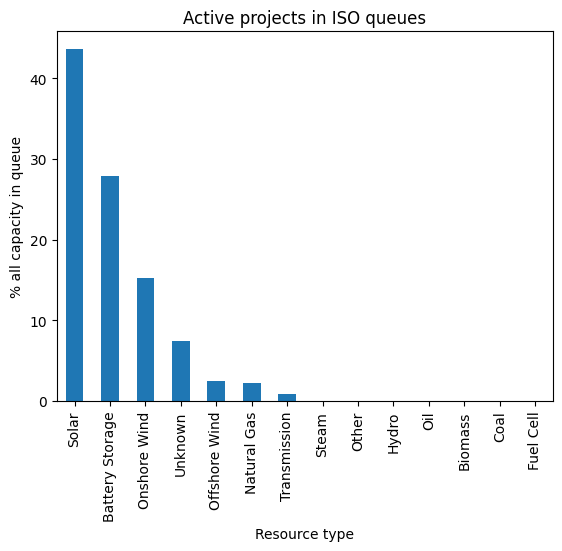

In [285]:
pct_gen_type = projects.groupby("resource_clean").capacity_mw.sum().sort_values(ascending=False) / projects.capacity_mw.sum() * 100

pct_gen_type.plot.bar(ylabel="% all capacity in queue", title="Active projects in ISO queues", xlabel="Resource type")

In [212]:
projects["resource"].eq("").value_counts()

False    7046
True        2
Name: resource, dtype: Int64

In [175]:
RESOURCE_DICT = {
    "Battery Storage": {"codes": ["Energy Storage", "Other - Battery Energy Storage"], "type": "Renewable"},
    "Biofuel": {"codes": [], "type": "Renewable"},
    "Biomass": {"codes": ["Biomass - Steam Turbine other than Combined-Cycle"], "type": "Renewable"},
    "Coal": {"codes": [], "type": "Fossil"},
    "Combustion Turbine": {"codes": [], "type": "Fossil"},
    "Fuel Cell": {"codes": [], "type": "Fossil"},
    "Geothermal": {"codes": [], "type": "Renewable"},
    "Hydro": {"codes": [], "type": "Renewable"},
    "Landfill Gas": {"codes": [], "type": "Fossil"},
    "Municipal Solid Waste": {"codes": [], "type": "Fossil"},
    "Natural Gas": {"codes": ["Gas - Combustion (gas) Turbine, but not part of a Combined-Cycle", "Gas - Internal Combustion Engine, eg. Reciprocating", "Gas - Combined-Cycle", "Gas - Steam Turbine other than Combined-Cycle"], "type": "Fossil"},
    "Nuclear": {"codes": [], "type": "Renewable"},
    "Offshore Wind": {"codes": [], "type": "Renewable"},
    "Oil": {"codes": [], "type": "Fossil"},
    "Onshore Wind": {"codes": ["Wind", "Wind - Wind Turbine"], "type": "Renewable"},
    "Other": {"codes": ["Other - Energy Storage"], "type": "Unknown Resource"},
    "Unknown": {"codes": ["Load", "Combined Cycle", "Other - Other"], "type": "Unknown Resource"},
    "Other Storage": {"codes": [], "type": "Renewable"},
    "Pumped Storage": {"codes": [], "type": "Renewable"},
    "Solar": {"codes": ["Solar", "Solar - Photovoltaic Solar"], "type": "Renewable"},
    "Steam": {"codes": [], "type": "Fossil"},
    "Transmission": {"codes": ["AC Transmission", "DC Transmission"], "type": "Other"},
    "Waste Heat": {"codes": [], "type": "Fossil"},
}


In [178]:
pd.set_option('display.max_colwidth', None)


In [182]:
projects.region.unique()

array(['miso', 'caiso', 'pjm', 'ercot', 'spp', 'nyiso', 'isone'],
      dtype=object)

In [193]:
region = "isone"
projects.query("region == @region").generation_type.value_counts()

SUN           156
BAT           114
SUN BAT        86
WND            38
NG              6
FC              3
DFO NG          3
WAT BAT         2
KER BAT         1
WDS             1
WAT             1
NG SUN BAT      1
Name: generation_type, dtype: Int64

In [187]:
gen_type = "Hybrid"
projects.query("region == @region & generation_type == @gen_type")

,actual_completion_date,capacity_mw,county,generation_type,interconnecting_entity,interconnection_location,project_name,proposed_completion_date,queue_date,queue_id,state,status,summer_capacity_mw,transmission_owner,winter_capacity_mw,withdrawal_comment,withdrawn_date,region,state_id_fips,county_id_fips,geocoded_locality_name,geocoded_locality_type,geocoded_containing_county
project_id,,,,,,,,,,,,,,,,,,,,,,,
11,NaT,150.0,Faribault,Hybrid,<NA>,Huntley to Blue Earth 161kV,<NA>,<NA>,2020-06-23 04:00:00+00:00,J1572,MN,active,150.0,Northern States Power (Xcel Energy),150.0,<NA>,<NA>,miso,27,27043,Faribault,county,Faribault
21,NaT,499.0,Calhoun,Hybrid,<NA>,Argenta to Tompkins 345kV line,<NA>,2025-06-01 04:00:00+00:00,2020-06-25 04:00:00+00:00,J1586,MI,active,499.0,ITC Transmission,499.0,<NA>,<NA>,miso,26,26025,Calhoun,county,Calhoun
29,NaT,100.0,Iberia,Hybrid,<NA>,Morbihan - Hopkins 138kV,<NA>,2025-09-01 04:00:00+00:00,2020-06-23 04:00:00+00:00,J1599,LA,active,100.0,CLECO Corporation,100.0,<NA>,<NA>,miso,22,22045,Iberia,county,Iberia
53,NaT,200.0,Spencer,Hybrid,<NA>,North East (Castle) - Culley 138kV,<NA>,<NA>,2022-02-17 05:00:00+00:00,J1642,IN,active,200.0,"Southern Indiana Gas & Electric Company d/b/a Vectren Energy Delivery of Indiana, Inc.",200.0,<NA>,<NA>,miso,18,18147,Spencer,county,Spencer
76,NaT,100.0,Evangeline,Hybrid,<NA>,Coughlin - Plaisance 138 kV,<NA>,2026-09-01 04:00:00+00:00,2022-07-07 04:00:00+00:00,J1686,LA,active,100.0,CLECO Corporation,100.0,<NA>,<NA>,miso,22,22039,Evangeline,county,Evangeline
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1325,NaT,100.0,Claiborne,Hybrid,<NA>,Haynesville South 115kV Substation,<NA>,<NA>,2022-09-15 04:00:00+00:00,J2958,LA,active,100.0,"Entergy Louisiana, LLC",100.0,<NA>,<NA>,miso,22,22027,Claiborne,county,Claiborne
1326,NaT,200.0,Starke,Hybrid,<NA>,Rollin Schahfer (17SCHAHFER 255110) 345 kV,<NA>,<NA>,2022-09-15 04:00:00+00:00,J2959,IN,active,200.0,Northern Indiana Public Service Company,200.0,<NA>,<NA>,miso,18,18149,Starke,county,Starke
1327,NaT,150.0,Spencer,Hybrid,<NA>,10CULY13 253500 (F.B. Culley ) - 10AEP_T 353586 (tap between Culley (10CULY13 253500) - Grandview (,<NA>,<NA>,2022-09-15 04:00:00+00:00,J2960,IN,active,150.0,"Southern Indiana Gas & Electric Company d/b/a Vectren Energy Delivery of Indiana, Inc.",150.0,<NA>,<NA>,miso,18,18147,Spencer,county,Spencer


In [164]:
projects[["region", "generation_type"]].value_counts().head(30)

region  generation_type                                  
pjm     Solar                                                1529
miso    Solar                                                 685
pjm     Storage                                               627
ercot   Other - Battery Energy Storage                        584
        Solar - Photovoltaic Solar                            381
pjm     Solar; Storage                                        370
miso    Battery Storage                                       270
        Hybrid                                                228
nyiso   Energy Storage                                        204
spp     Solar                                                 203
caiso   Storage                                               199
nyiso   Solar                                                 160
isone   SUN                                                   156
spp     Battery/Storage                                       136
pjm     Wind      

In [151]:
projects.state_id_fips.isna().value_counts()

False    7112
True       44
Name: state_id_fips, dtype: int64

In [152]:
projects.county_id_fips.isna().value_counts()

False    7017
True      139
Name: county_id_fips, dtype: int64

In [132]:
projects.state.isna().value_counts()

False    7118
True       38
Name: state, dtype: int64

In [133]:
projects.county.isna().value_counts()

False    7046
True      110
Name: county, dtype: int64

In [145]:
projects.county.sample(10)

713          Franklin
7200        Brunswick
8697       Dorchester
5965            Adams
7631    Prince Edward
7613           McKean
639            Medina
8             Lincoln
8890           Mercer
7370        Frederick
Name: county, dtype: string

In [126]:
projects.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7156 entries, 453 to 962
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   actual_completion_date    2 non-null      datetime64[ns]
 1   capacity_mw               7128 non-null   Float64       
 2   county                    7046 non-null   string        
 3   generation_type           7048 non-null   string        
 4   interconnecting_entity    1051 non-null   string        
 5   interconnection_location  3850 non-null   string        
 6   project_name              5250 non-null   string        
 7   proposed_completion_date  3076 non-null   object        
 8   queue_date                7152 non-null   object        
 9   queue_id                  7156 non-null   object        
 10  state                     7118 non-null   string        
 11  status                    7156 non-null   string        
 12  summer_capacity_mw 

In [93]:
[col for col in list(projects) if "date" in col]

['actual_completion_date',
 'proposed_completion_date',
 'queue_date',
 'withdrawn_date']

In [119]:
projects["proposed_completion_date"].isna().value_counts()

True     4080
False    3076
Name: proposed_completion_date, dtype: int64

In [120]:
pd.to_datetime(projects["proposed_completion_date"]).isna().value_counts()

True     4080
False    3076
Name: proposed_completion_date, dtype: int64

In [101]:
projects[~projects["proposed_completion_date"].isna()][["proposed_completion_date", "region"]].sample(5)

,proposed_completion_date,region
836,2025-08-25 00:00:00,ercot
1131,2025-07-01 00:00:00,ercot
797,2025-11-30 00:00:00,ercot
1128,2025-12-31 00:00:00,ercot
1172,2025-03-31 00:00:00,ercot


In [112]:
projects.query("region == 'spp'")["proposed_completion_date"]

27       1/5/2028
28     12/31/2030
29     12/31/2030
30     12/31/2030
31     12/31/2030
          ...    
663     12/1/2027
664     12/1/2027
671     9/30/2024
673    12/31/2025
692    12/16/2024
Name: proposed_completion_date, Length: 568, dtype: object

In [113]:
pd.to_datetime(projects.query("region == 'spp'")["proposed_completion_date"])

27    2028-01-05
28    2030-12-31
29    2030-12-31
30    2030-12-31
31    2030-12-31
         ...    
663   2027-12-01
664   2027-12-01
671   2024-09-30
673   2025-12-31
692   2024-12-16
Name: proposed_completion_date, Length: 568, dtype: datetime64[ns]

## Clean individual status columns
Seems like most of the desired columns are shared amongs the ISOs except for the interconnection status information. We'll have collect these separately.

### ERCOT

In [34]:
ercot = gs_dfs["ercot"]
ercot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1403 entries, 0 to 1402
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Queue ID                      1403 non-null   string        
 1   Project Name                  1403 non-null   string        
 2   Interconnecting Entity        1403 non-null   string        
 3   County                        1403 non-null   string        
 4   State                         1403 non-null   string        
 5   Interconnection Location      1403 non-null   string        
 6   Transmission Owner            0 non-null      string        
 7   Generation Type               1403 non-null   string        
 8   Capacity (MW)                 1403 non-null   Float64       
 9   Summer Capacity (MW)          0 non-null      string        
 10  Winter Capacity (MW)          0 non-null      string        
 11  Queue Date                    

In [48]:
ercot.sample(5)

,Queue ID,Project Name,Interconnecting Entity,County,State,Interconnection Location,Transmission Owner,Generation Type,Capacity (MW),Summer Capacity (MW),Winter Capacity (MW),Queue Date,Status,Proposed Completion Date,Withdrawn Date,Withdrawal Comment,Actual Completion Date,Fuel,Technology,GIM Study Phase,Screening Study Started,Screening Study Complete,FIS Requested,FIS Approved,Economic Study Required,IA Signed,Air Permit,GHG Permit,Water Availability,Meets Planning,Meets All Planning,CDR Reporting Zone,Approved for Energization,Approved for Synchronization,Comment
36,19INR0085,Blue Jay Solar,"Blue Jay Solar I, LLC",Grimes,Texas,4 Iola 138kV,<NA>,Solar - Photovoltaic Solar,141.05,<NA>,<NA>,2017-05-30,Completed,2023-10-27,<NA>,<NA>,2022-06-28,Solar,Photovoltaic Solar,"SS Completed, FIS Completed, IA",2017-05-30,2017-08-11,2018-02-15,2021-04-26,No,2020-10-26,Not Required,Not Required,Not Required,2020-12-02,2021-04-26,NORTH,2021-11-11,2022-06-28,<NA>
501,23INR0239,Giga Texas Energy Storage,"Giga Texas Energy, LLC.",Travis,Texas,7047 Hornsby 345kV,<NA>,Other - Battery Energy Storage,131.05,<NA>,<NA>,2021-04-20,Completed,2024-01-31,<NA>,<NA>,NaT,Other,Battery Energy Storage,"SS Completed, FIS Completed, IA",2021-04-20,2021-07-02,2021-07-22,2022-08-22,No,2021-12-03,Not Required,Not Required,Not Required,2023-02-01,2023-02-01,SOUTH,NaT,NaT,<NA>
651,24INR0062,Eighteenmile Storage SLF,"Weser Solar, LLC",Goliad,Texas,Tap 5730 Four Corners to 5728 Choate 138 kV,<NA>,Other - Battery Energy Storage,0.0,<NA>,<NA>,2021-12-29,Active,2025-09-02,<NA>,<NA>,NaT,Other,Battery Energy Storage,"SS Completed, FIS Started, No IA",2021-12-29,2022-02-08,2022-01-07,NaT,<NA>,NaT,<NA>,<NA>,Not Required,NaT,NaT,SOUTH,NaT,NaT,<NA>
489,23INR0223,Garcitas Creek Solar,Garcitas Creek Solar LLC,Jackson,Texas,Tap 345 kV 5915 South Texas Project – 8249 Ang...,<NA>,Solar - Photovoltaic Solar,201.94,<NA>,<NA>,2021-10-05,Completed,2025-03-31,<NA>,<NA>,NaT,Solar,Photovoltaic Solar,"SS Completed, FIS Started, IA",2021-10-05,2021-12-08,2021-10-08,NaT,<NA>,2022-06-30,Not Required,Not Required,Not Required,2022-08-24,NaT,SOUTH,NaT,NaT,<NA>
1326,26INR0226,First Capitol BESS,"First Capitol BESS, LLC",Brazoria,Texas,TNWCOLMAIN1 (BUS#39500) to TNPALMETT 1 (BUS#39...,<NA>,Other - Battery Energy Storage,256.2,<NA>,<NA>,2023-10-04,Active,2026-05-31,<NA>,<NA>,NaT,Other,Battery Energy Storage,"SS Started, FIS Started, No IA",2023-10-04,NaT,2023-09-22,NaT,<NA>,NaT,<NA>,<NA>,Not Required,NaT,NaT,COASTAL,NaT,NaT,<NA>


In [45]:
ercot_phases = []

for i in ercot["GIM Study Phase"].str.split(", "):
    ercot_phases += i

In [47]:
set(ercot_phases)

{'FIS Completed',
 'FIS Not Started',
 'FIS Started',
 'IA',
 'No IA',
 'SS Completed',
 'SS Started'}

SS = Security Screening Study	
FIS = Full Interconnection Study	
IA = Interconnection Agreement; can be either of the following:	
      - Standard Generation Interconnection Agreement (SGIA)	
      - Public financially binding agreement	
      - An official letter from a Municipally Owned Utility or Electric Cooperative signifying developer intent to build and operate generation facilities and	
        interconnect with the MOU or EC

In [33]:
actionable_ia_statuses = {
    "Facility Study",
    "System Impact Study",
    "Phase 4 Study",
    "IA Pending",
}
nearly_certain_ia_statuses = {
    "Construction",
    "IA Executed",
    "Operational",
}

[
    "IA Executed"
    "Facility Study"
    "System Impact Study"
    "Not Started"
    "Construction"
    "Feasibility Study"
    "In Progress (unknown study)"
    "Operational"
    "Cluster Study"
    "Suspended"
    "Withdrawn"
    "IA Pending"
    "Phase 4 Study"
]

Not clear how ERCOT's status map to our existing statuses.

## NYISO

In [49]:
nyiso = gs_dfs["nyiso"]

In [50]:
nyiso

,Queue ID,Project Name,Interconnecting Entity,County,State,Interconnection Location,Transmission Owner,Generation Type,Capacity (MW),Summer Capacity (MW),Winter Capacity (MW),Queue Date,Status,Proposed Completion Date,Withdrawn Date,Withdrawal Comment,Actual Completion Date,Proposed In-Service,Proposed Initial-Sync Date,Last Updated Date,Z,S,Availability of Studies,SGIA Tender Date
0,276,Homer Solar Energy Center,<NA>,Cortland,NY,<NA>,NM-NG,Solar,90.0,90.0,90.0,2008-01-30,Active,2026-04-01,<NA>,<NA>,NaT,NaT,2026-03-01,2023-07-31,C,11,"FES, SRIS, FS",2021-02-08
1,0396A,Wood Street Transformer,<NA>,Putnam,NY,<NA>,NYSEG,AC Transmission,0.0,<NA>,<NA>,2012-12-14,Active,NaT,<NA>,<NA>,NaT,NaT,NaT,2021-04-30,G,12,SIS,NaT
2,429,North Rockland Station,<NA>,Steuben,NY,<NA>,ConEd,AC Transmission,0.0,<NA>,<NA>,2014-02-12,Active,NaT,<NA>,<NA>,NaT,NaT,NaT,2022-03-31,G,12,SIS,NaT
3,430,Cedar Rapids Transmission,<NA>,St. Lawrence,NY,<NA>,NM-NG,AC Transmission,0.0,<NA>,<NA>,2014-03-05,Active,NaT,<NA>,<NA>,NaT,NaT,NaT,2019-12-31,D,12,"SIS, FS",2018-10-02
4,495,Mohawk Solar,<NA>,Montgomery,NY,<NA>,NM-NG,Solar,90.5,90.5,90.5,2015-04-02,Active,2024-11-01,<NA>,<NA>,NaT,NaT,2024-09-01,2022-09-30,F,11,"FES, SRIS, FS",2021-02-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1621,0775,Puckett Solar,<NA>,Chenango,NY,<NA>,NYSEG,Solar,20.0,20.0,20.0,2018-10-22,Completed,NaT,<NA>,<NA>,2022-09-30,NaT,NaT,2022-09-30,C,14,"SIS, FS",NaT
1622,0781,Marcy South SSR Detection,<NA>,Delaware,NY,<NA>,NYPA,AC Transmission,0.0,<NA>,<NA>,2018-12-03,Completed,NaT,<NA>,<NA>,2019-09-30,NaT,NaT,2019-09-30,E,14,"SIS, FS",NaT
1623,0849,Somerset Load,<NA>,Niagara,NY,<NA>,NYSEG,Load,250.0,250.0,250.0,2019-05-21,Completed,NaT,<NA>,<NA>,2022-07-31,NaT,NaT,2022-07-31,A,14,"SIS, FS",NaT
1624,0769,North County Energy Storage,<NA>,Franklin,NY,<NA>,NYPA,Energy Storage,20.0,20.0,20.0,2018-10-05,Completed,NaT,<NA>,<NA>,2023-09-30,NaT,NaT,2023-09-30,D,14,SIS,NaT
